# Scatter Plots

## Load Libraries

In [1]:
from obspy import UTCDateTime
from scipy.signal import welch
from tqdm import tqdm
from pathlib import Path

import os, sys
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# from andbro__store_as_pickle import __store_as_pickle

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [168]:
## ---------------------------------------

name0 = "FFBI"

name1 = "ROMY_U"
name2 = "ROMY_V"
name3 = "ROMY_Z"

# t1 ,t2 = "2023-09-23", "2023-10-23"

In [139]:
# ## ---------------------------------------

config = {}

## specify paths
config['path_to_figs'] = data_path+f"LNM2/figures/scatter/"

config['path_to_data'] = data_path+f"LNM2/data/"

## Methods

In [140]:
dat1 = pd.read_pickle(config['path_to_data']+name0+".pkl")
dat2 = pd.read_pickle(config['path_to_data']+name2+".pkl")

In [141]:
def __get_octave_bands(fmin, fmax, fband_type="octave", plot=False):

    """
    Computing octave / one-third-octave bands

    Arguments:
        - fmin:    (float) minimum center frequency
        - fmax:    (float) maximum center frequency
        - fband_type:    [octave] / one-third-octave
        - plot:    (bool) show frequency bands

    Example:

    >>> flower, fupper, fcenter = __get_octave_bands(f_min, f_max, fband_type="octave", plot=False)

    """

    import matplotlib.pyplot as plt
    from numpy import sqrt, array
    from acoustics import bands

    f_lower, f_upper, f_centers = [], [], []

    if fband_type == "octave":
        f_centers = bands.octave(fmin, fmax)
        f_lower = bands.octave_low(fmin, fmax)
        f_upper = bands.octave_high(fmin, fmax)

    if fband_type == "one-third-octave":
        f_centers = bands.third(fmin, fmax)
        f_lower = bands.third_low(fmin, fmax)
        f_upper = bands.third_high(fmin, fmax)    

    if plot:
        plt.figure()
        for fl, fc, fu in zip(f_lower, f_centers, f_upper):
            plt.axvline(fu, color="r")
            plt.axvline(fl, color="r")
            plt.axvline(fc)
            plt.axvline(fmin, color="g")
            plt.axvline(fmax, color="g")
            plt.xscale("log")
        plt.show()

    return array(f_lower), array(f_upper), array(f_centers)

In [142]:
def __quantile_regression(x, y, quantiles=[0.05, 0.5, 0.95]):


    from sklearn.utils.fixes import parse_version, sp_version
    from sklearn.linear_model import QuantileRegressor
    from numpy import newaxis, zeros_like, bool_, logical_or

    # This is line is to avoid incompatibility if older SciPy version.
    # You should use `solver="highs"` with recent version of SciPy.
    solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"

    predictions = {}

    X = x[:, newaxis]

    out_bounds_predictions = zeros_like(y, dtype=bool_)

    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
        y_pred = qr.fit(X, y).predict(X)
        predictions[quantile] = y_pred

        if quantile == min(quantiles):
            out_bounds_predictions = logical_or(
                out_bounds_predictions, y_pred >= y
            )
        elif quantile == max(quantiles):
            out_bounds_predictions = logical_or(
                out_bounds_predictions, y_pred <= y
            )

    return predictions

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 1.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

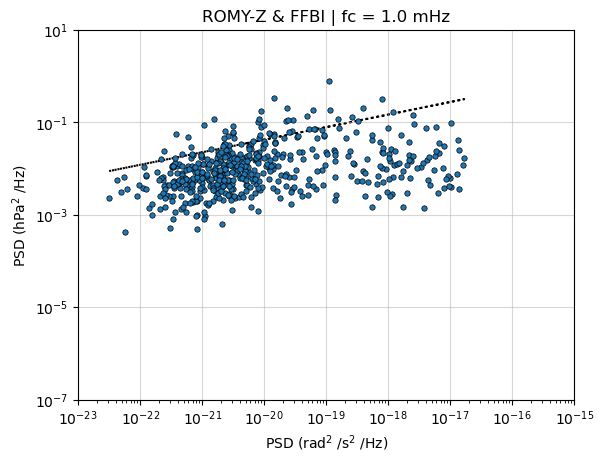

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 1.6 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

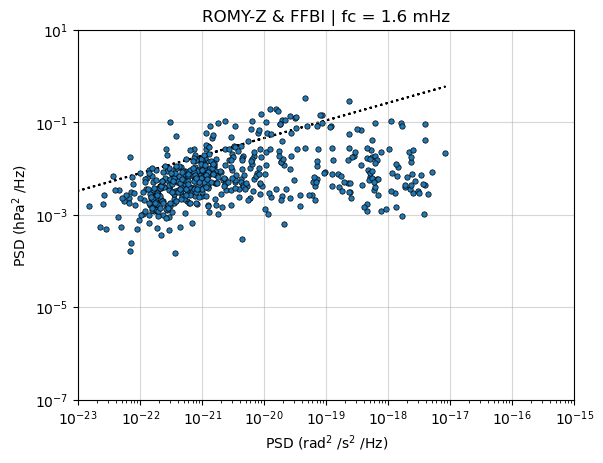

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 2.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

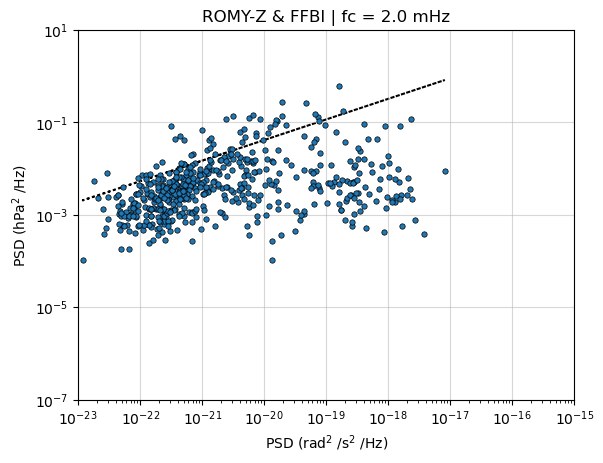

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 2.5 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

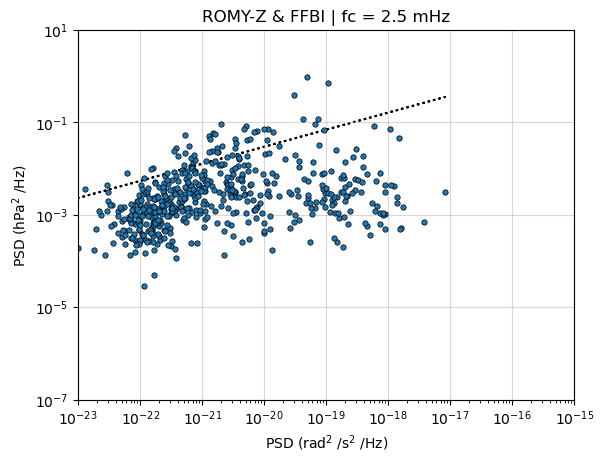

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 3.15 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

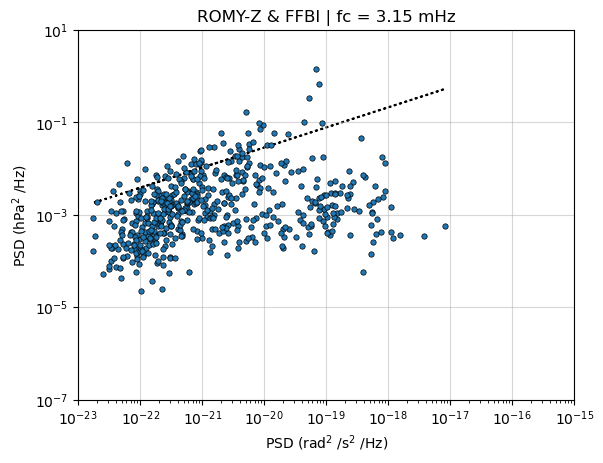

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 4.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

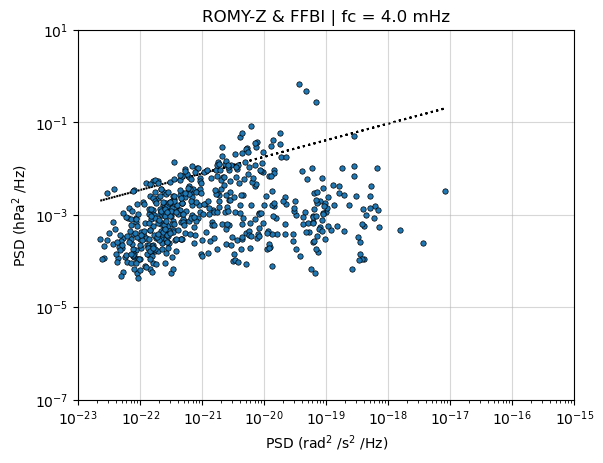

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 5.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

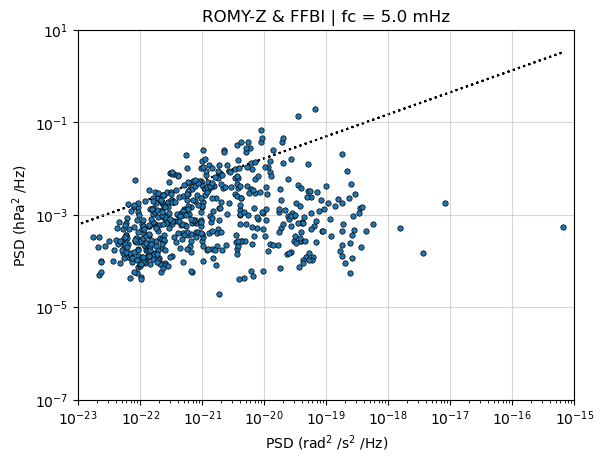

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 6.3 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

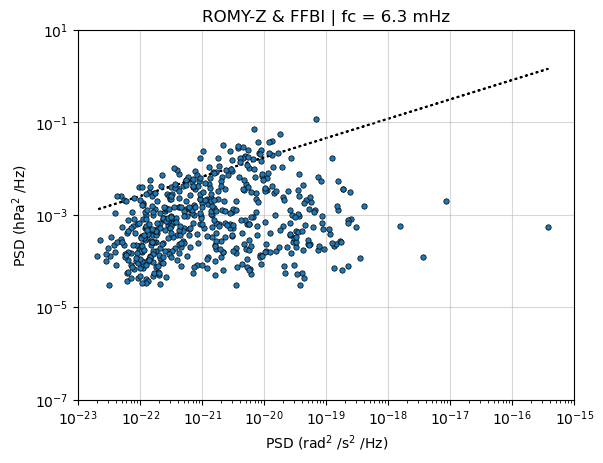

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 8.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

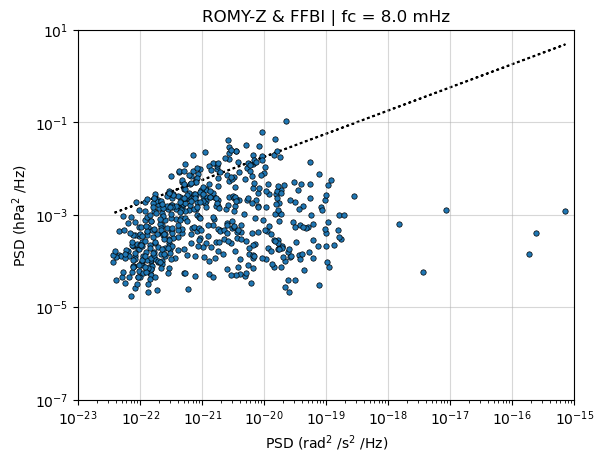

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 10.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

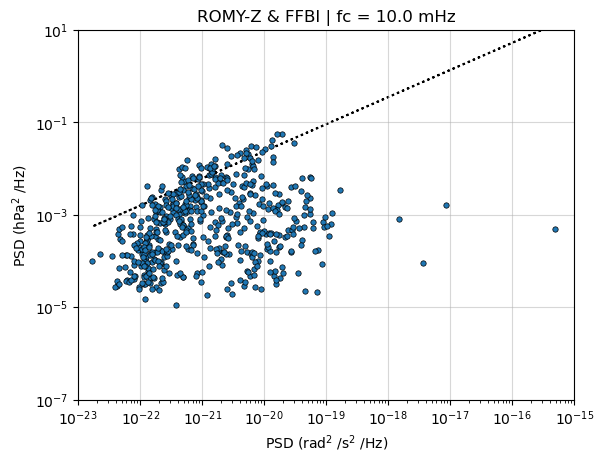

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 12.5 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

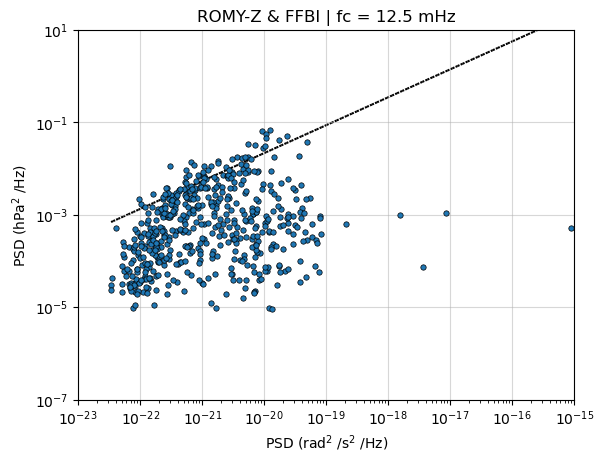

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 16.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

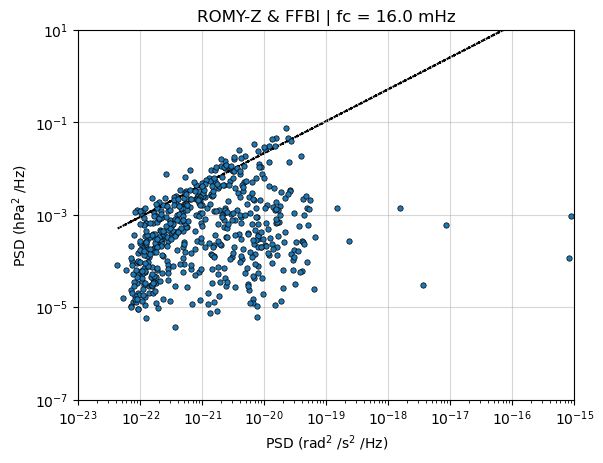

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 20.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

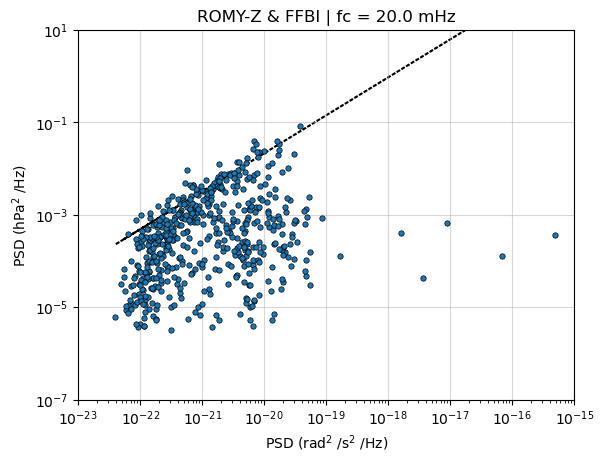

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 25.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

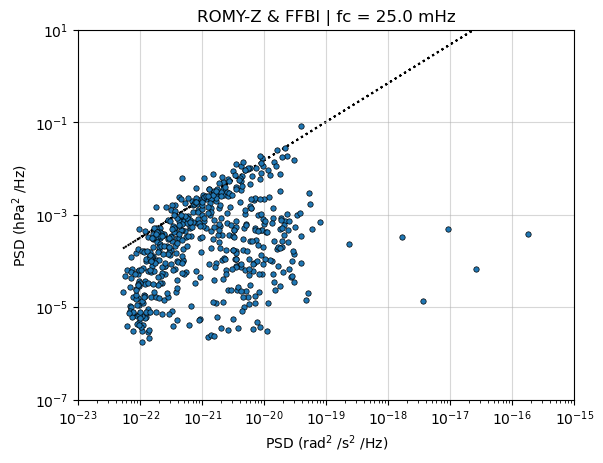

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 31.5 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

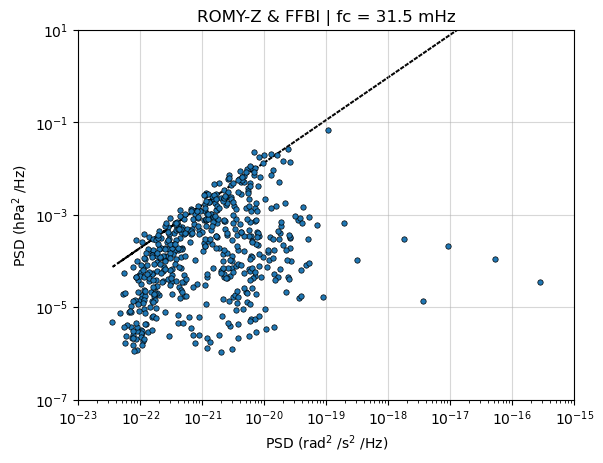

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 40.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

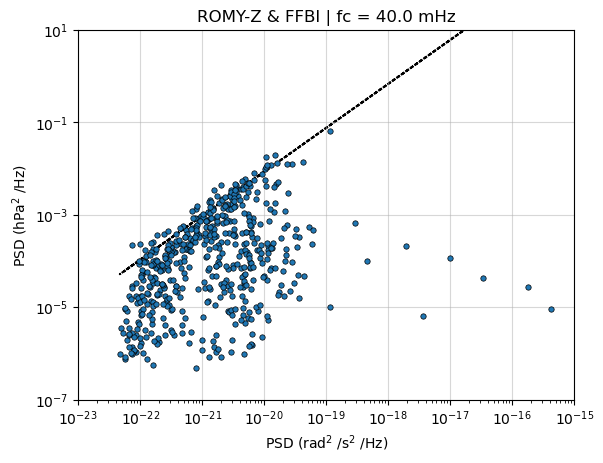

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 50.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

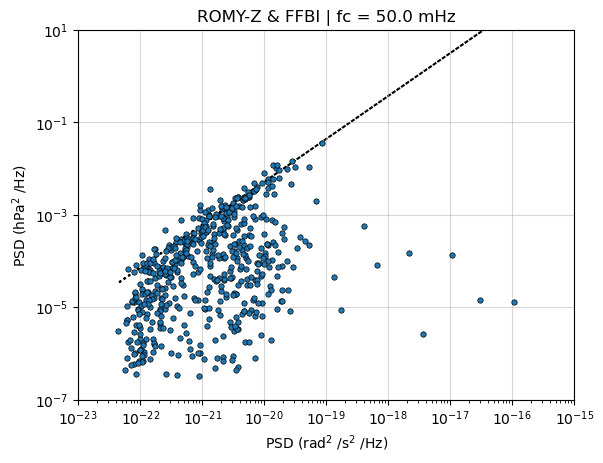

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 63.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

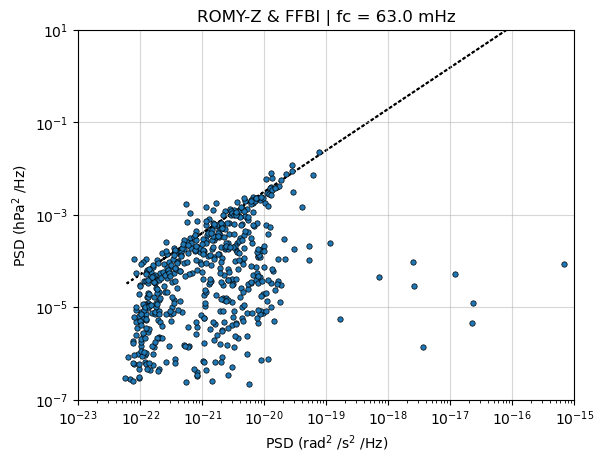

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 80.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

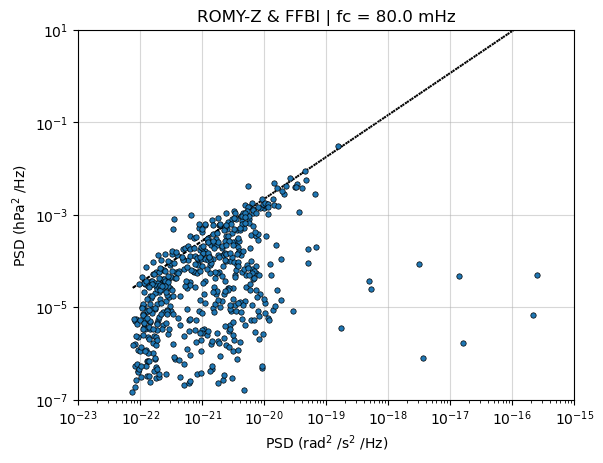

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 100.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

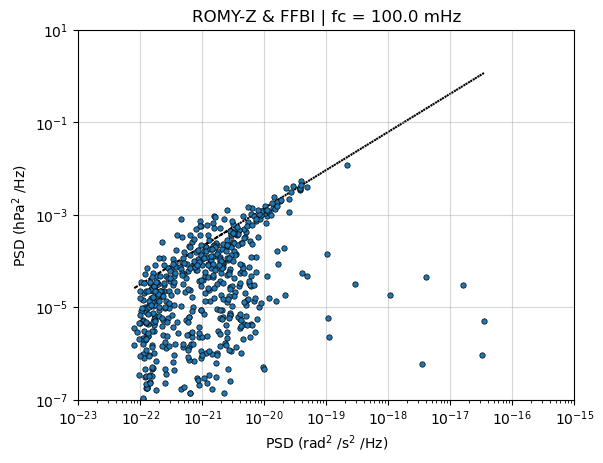

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 125.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

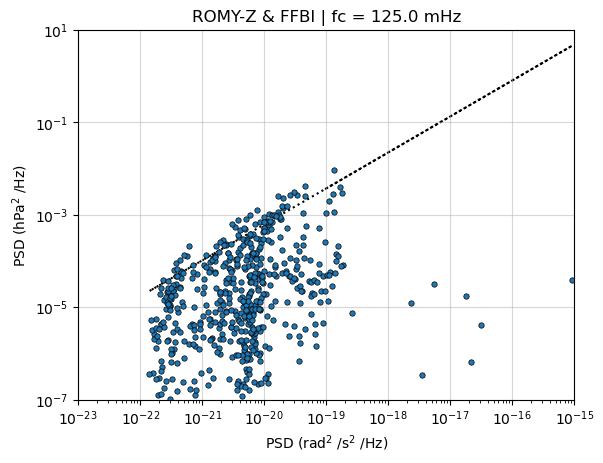

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 160.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

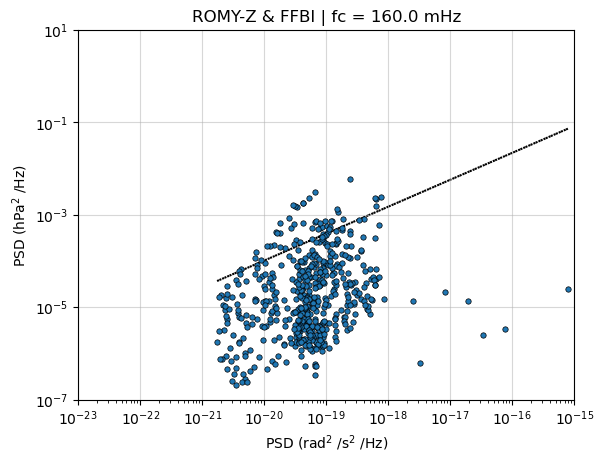

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 200.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

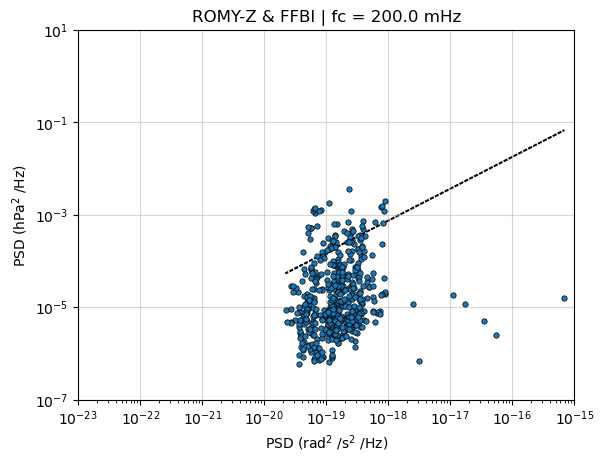

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 250.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

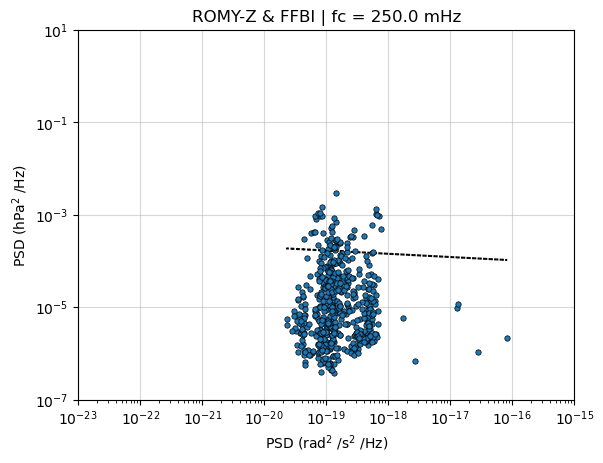

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 315.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

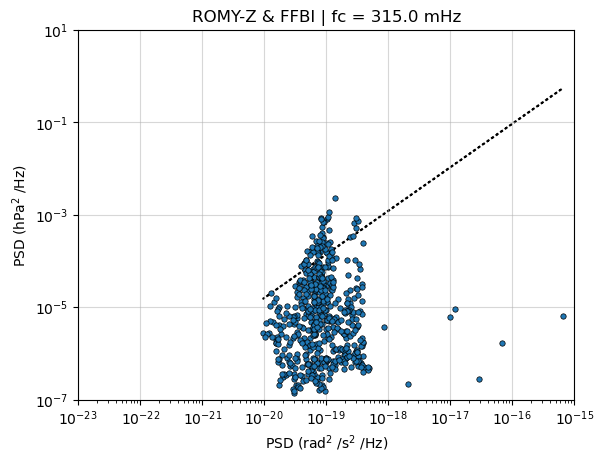

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 400.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

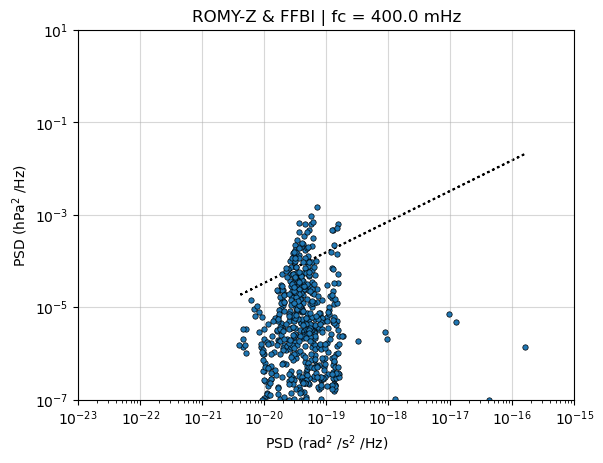

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 500.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

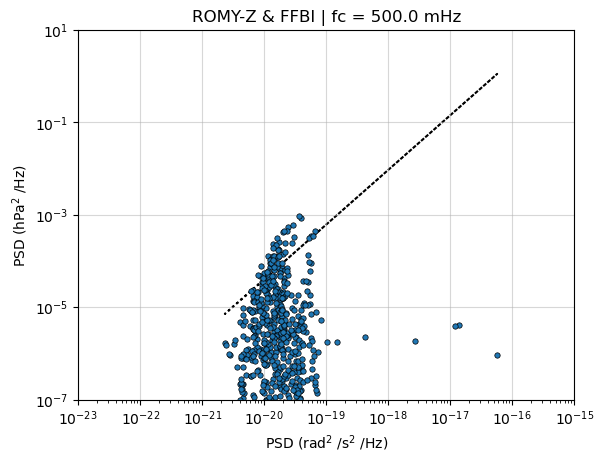

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 630.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

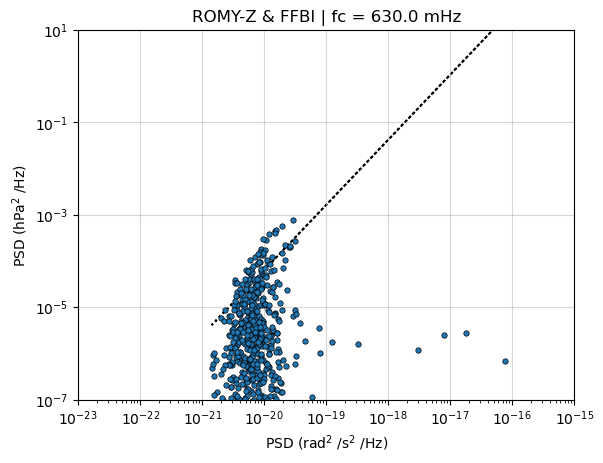

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 800.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

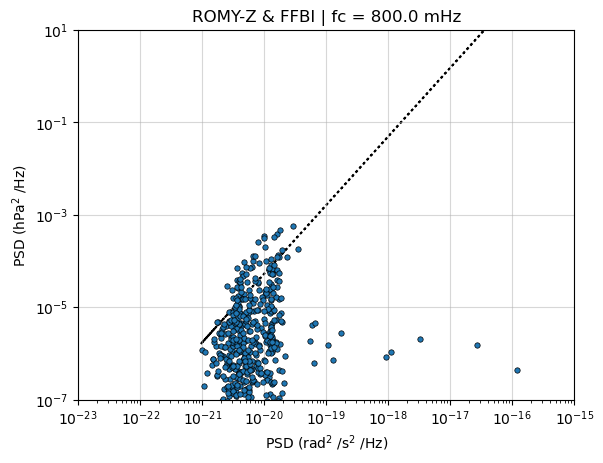

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


Text(0.5, 1.0, 'ROMY-Z & FFBI | fc = 1000.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

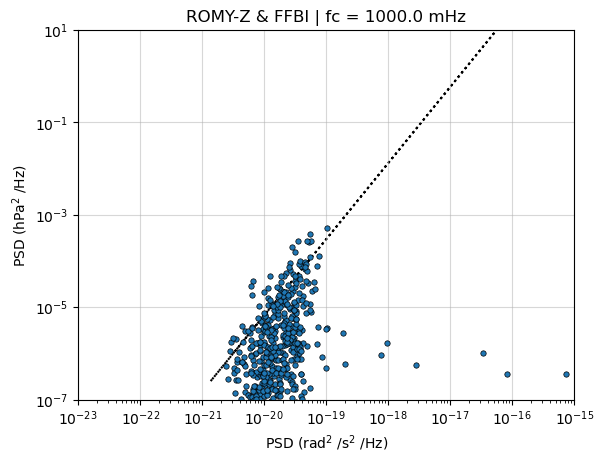

In [137]:
f_lower, f_upper, f_center = __get_octave_bands(1e-3, 1e0, fband_type="one-third-octave", plot=False)

N_bands = dat1.shape[1] - 1

bands = dat1.keys()[1:]

for _n, band in enumerate(bands):

    # if not _n == 11:
    #     continue

    _dat1 = dat1.loc[:, ["dates", band]]
    _dat2 = dat2.loc[:, ["dates", band]]

    _df = pd.merge(left=_dat1, right=_dat2, how="inner", on="dates")

    _df.dropna(inplace=True)

    _df = _df[_df.iloc[:, 1] < 1e-15]
    _df = _df.reset_index(drop=True)


    xx = np.log10(_df.iloc[:, 1])
    yy = np.log10(_df.iloc[:, 2])

    try:
        pre = __quantile_regression(xx, yy, quantiles=[0.1, 0.5, 0.9])

    except:
        continue

    if not _df.empty:

        fig = plt.figure()

        # ys = powerfit(xx, yy, xx)
        # plt.plot(xx, ys, color="tab:green", ls="--")

        # plt.scatter(_df[f'{band}_x'], _df[f'{band}_y'], s=15, edgecolors="black", lw=0.5, zorder=2)
        plt.scatter(10**xx, 10**yy, s=15, edgecolors="black", lw=0.5, zorder=2)

        plt.plot(10**xx, 10**pre[0.9], color="k", zorder=1, ls=":")

        plt.xscale("log")
        plt.yscale("log")

        plt.title(f"{name1.replace('_','-')} & {name2.replace('_','-')} | fc = {float(_df.keys()[1][:-2])*1e3} mHz")
        plt.ylabel(r"PSD (hPa$^2$ /Hz)")
        plt.xlabel(r"PSD (rad$^2$ /s$^2$ /Hz)")
        plt.grid(zorder=0, alpha=0.5)

        plt.ylim(1e-7, 1e1)
        plt.xlim(1e-23, 1e-15)

        plt.show();

        fig.savefig(config['path_to_figs']+f"{name1}/{str(_n).rjust(3, '0')}_{name1}_{name2}_{band}Hz.png", format="png", dpi=200, bbox_inches='tight');

## Plot all 

In [169]:
dat0 = pd.read_pickle(config['path_to_data']+name0+".pkl")

dat1 = pd.read_pickle(config['path_to_data']+name1+".pkl")
dat2 = pd.read_pickle(config['path_to_data']+name2+".pkl")
dat3 = pd.read_pickle(config['path_to_data']+name3+".pkl")

In [176]:
dat0

dates     0.001  0.00125    0.0016     0.002    0.0025   0.00315  \
0    20230923_00  0.017425      NaN  0.009499  0.008473  0.011561  0.006078   
1    20230923_01  0.031656      NaN  0.026072  0.020572  0.027255  0.012571   
2    20230923_02  0.038789      NaN  0.015347  0.009212  0.003034  0.002729   
3    20230923_03  0.015444      NaN  0.021015  0.009258  0.004000  0.002082   
4    20230923_04  0.024912      NaN  0.015081  0.006539  0.004831  0.007250   
..           ...       ...      ...       ...       ...       ...       ...   
739  20231023_19  0.032223      NaN  0.013572  0.008827  0.030750  0.033159   
740  20231023_20  0.003630      NaN  0.007555  0.022137  0.016850  0.022542   
741  20231023_21  0.030312      NaN  0.038435  0.058605  0.046803  0.006756   
742  20231023_22  0.047995      NaN  0.045015  0.019402  0.029543  0.015926   
743  20231023_23  0.051266      NaN  0.028896  0.027329  0.018732  0.024790   

        0.004     0.005    0.0063  ...         0.125      0.16       0.2  \
0    0.002956  0.001885  0.001587  ...  2.625402e-04  0.000165  0.000131   
1    0.001030  0.001310  0.000975  ...  8.110334e-05  0.000085  0.000046   
2    0.001010  0.000898  0.001056  ...  7.763474e-05  0.000049  0.000042   
3    0.001719  0.005418  0.001935  ...  1.405477e-04  0.000090  0.000068   
4    0.003127  0.002539  0.005729  ...  2.116137e-04  0.000096  0.000058   
..        ...       ...       ...  ...           ...       ...       ...   
739  0.002737  0.002297  0.003344  ...  2.270126e-05  0.000014  0.000012   
740  0.039054  0.030018  0.005573  ...  4.160558e-06  0.000004  0.000004   
741  0.084798  0.115622  0.044886  ...  5.526254e-07  0.000001  0.000002   
742  0.008348  0.004307  0.005177  ...  4.038288e-07  0.000001  0.000001   
743  0.036189  0.044245  0.025840  ...  1.528124e-06  0.000002  0.000002   

             0.25         0.315           0.4           0.5          0.63  \
0    1.056856e-04  7.437795e-05  5.949291e-05  4.321320e-05  3.376698e-05   
1    3.279878e-05  2.471513e-05  1.814139e-05  1.144809e-05  6.081962e-06   
2    3.855803e-05  2.307613e-05  1.523963e-05  1.009787e-05  5.427968e-06   
3    4.959224e-05  3.137029e-05  2.588615e-05  2.077662e-05  1.320658e-05   
4    6.006683e-05  2.913977e-05  2.394734e-05  2.146121e-05  1.378575e-05   
..            ...           ...           ...           ...           ...   
739  6.062033e-06  3.924210e-06  1.972108e-06  1.455939e-06  9.365145e-07   
740  2.142931e-06  1.034083e-06  5.400821e-07  3.740267e-07  2.441060e-07   
741  8.117793e-07  3.597328e-07  1.605968e-07  8.180719e-08  5.784563e-08   
742  6.308107e-07  3.080605e-07  1.340716e-07  8.064757e-08  5.811947e-08   
743  7.339128e-07  3.305962e-07  1.786864e-07  1.124937e-07  7.125326e-08   

              0.8           1.0  
0    1.608663e-05  1.170058e-05  
1    3.836132e-06  2.207094e-06  
2    3.329447e-06  2.032981e-06  
3    7.835593e-06  5.101245e-06  
4    7.951731e-06  5.301498e-06  
..            ...           ...  
739  6.464608e-07  4.617666e-07  
740  1.470417e-07  1.246395e-07  
741  3.040453e-08  2.796267e-08  
742  4.110347e-08  3.704918e-08  
743  4.623149e-08  3.589712e-08  

[744 rows x 32 columns]

           dates   0.001_x       0.001_y
0    20230923_00  0.017425  3.178100e-18
1    20230923_01  0.031656  4.637615e-17
2    20230923_02  0.038789  4.780266e-18
3    20230923_03  0.015444  2.830693e-18
4    20230923_04  0.024912  1.758833e-17
..           ...       ...           ...
379  20231022_19  0.010355  1.010854e-13
380  20231022_20  0.006027  5.529695e-13
381  20231022_21  0.017133  4.366699e-14
382  20231022_22  0.012062  4.976354e-19
383  20231022_23  0.018909  6.149554e-20

[384 rows x 3 columns]
           dates   0.001_x       0.001_y
0    20230923_00  0.017425  3.178100e-18
1    20230923_01  0.031656  4.637615e-17
2    20230923_02  0.038789  4.780266e-18
3    20230923_03  0.015444  2.830693e-18
4    20230923_04  0.024912  1.758833e-17
..           ...       ...           ...
369  20231022_09  0.008601  5.753093e-20
370  20231022_10  0.006403  1.136035e-19
378  20231022_18  0.005709  8.671067e-18
382  20231022_22  0.012062  4.976354e-19
383  20231022_23  0.018909  6.149

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 1.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 1.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 1.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

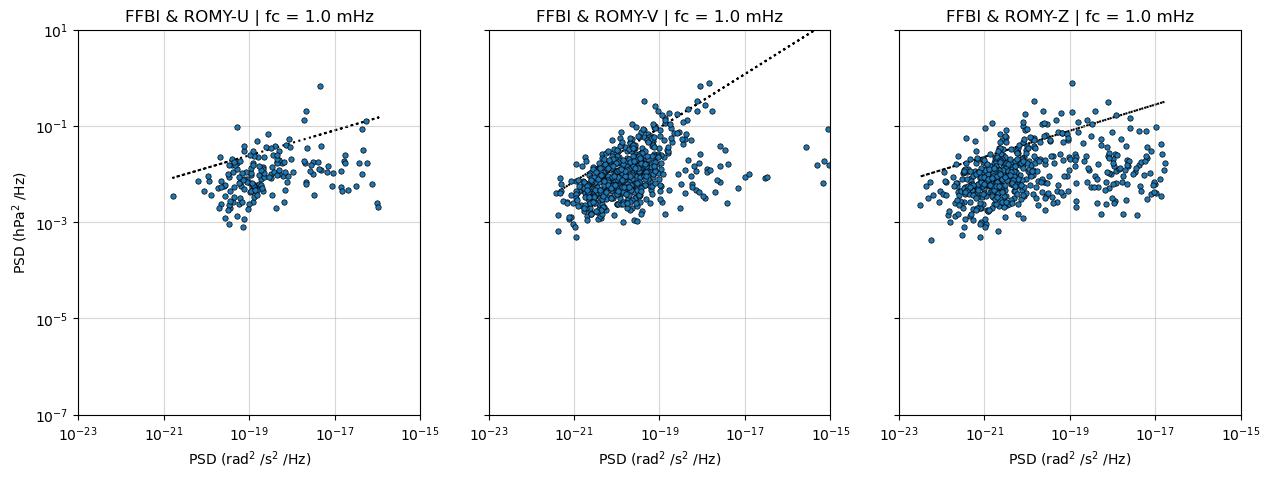

Empty DataFrame
Columns: [dates, 0.00125_x, 0.00125_y]
Index: []
Empty DataFrame
Columns: [dates, 0.00125_x, 0.00125_y]
Index: []
Empty DataFrame
Columns: [dates, 0.00125_x, 0.00125_y]
Index: []
           dates  0.0016_x      0.0016_y
0    20230923_00  0.009499  4.517101e-19
1    20230923_01  0.026072  1.972929e-17
2    20230923_02  0.015347  1.045661e-18
3    20230923_03  0.021015  8.568768e-20
4    20230923_04  0.015081  6.133196e-18
..           ...       ...           ...
379  20231022_19  0.004331  4.978118e-14
380  20231022_20  0.005007  4.934248e-13
381  20231022_21  0.006225  2.435626e-13
382  20231022_22  0.009004  1.670463e-20
383  20231022_23  0.026942  9.301252e-20

[384 rows x 3 columns]
           dates  0.0016_x      0.0016_y
0    20230923_00  0.009499  4.517101e-19
1    20230923_01  0.026072  1.972929e-17
2    20230923_02  0.015347  1.045661e-18
3    20230923_03  0.021015  8.568768e-20
4    20230923_04  0.015081  6.133196e-18
..           ...       ...           ...
36

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 1.6 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 1.6 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 1.6 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

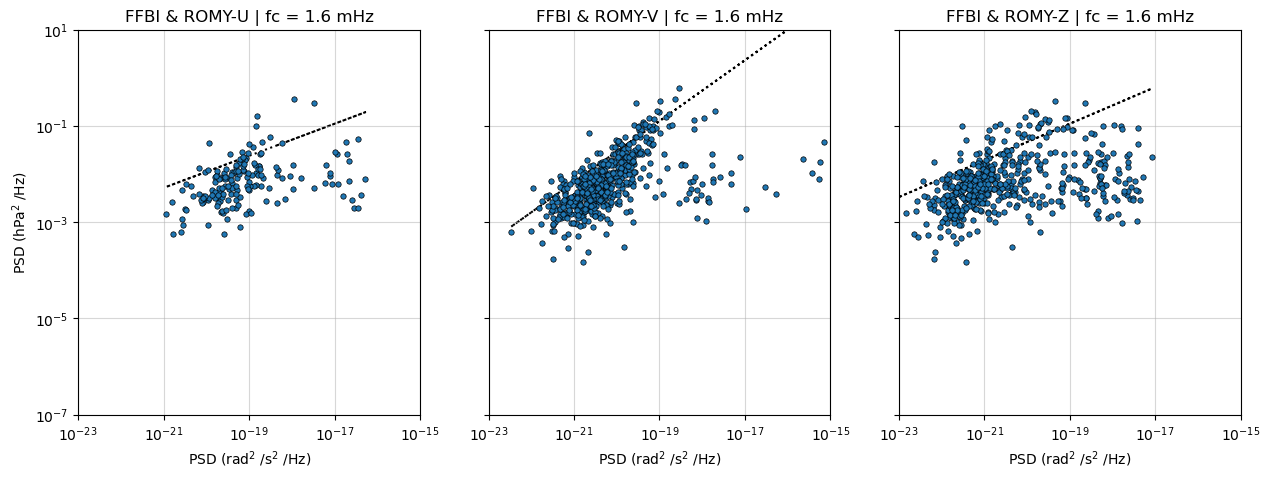

           dates   0.002_x       0.002_y
0    20230923_00  0.008473  1.500465e-19
1    20230923_01  0.020572  9.405561e-18
2    20230923_02  0.009212  1.728557e-19
3    20230923_03  0.009258  1.046262e-19
4    20230923_04  0.006539  3.178679e-18
..           ...       ...           ...
379  20231022_19  0.001915  5.289442e-15
380  20231022_20  0.002253  1.171422e-13
381  20231022_21  0.002193  3.214396e-13
382  20231022_22  0.027778  6.961646e-20
383  20231022_23  0.020184  6.310380e-20

[384 rows x 3 columns]
           dates   0.002_x       0.002_y
0    20230923_00  0.008473  1.500465e-19
1    20230923_01  0.020572  9.405561e-18
2    20230923_02  0.009212  1.728557e-19
3    20230923_03  0.009258  1.046262e-19
4    20230923_04  0.006539  3.178679e-18
..           ...       ...           ...
370  20231022_10  0.003990  1.399907e-20
377  20231022_17  0.003708  7.177674e-16
378  20231022_18  0.002624  8.963486e-18
382  20231022_22  0.027778  6.961646e-20
383  20231022_23  0.020184  6.310

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 2.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 2.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 2.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

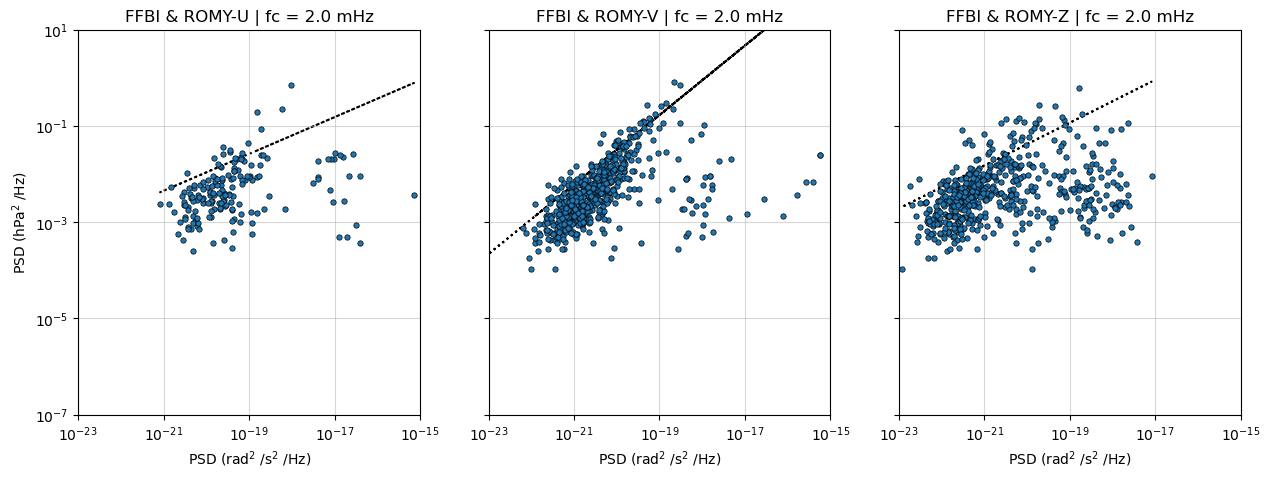

           dates  0.0025_x      0.0025_y
0    20230923_00  0.011561  5.428071e-20
1    20230923_01  0.027255  6.955396e-18
2    20230923_02  0.003034  6.766728e-20
3    20230923_03  0.004000  3.518744e-20
4    20230923_04  0.004831  1.398689e-18
..           ...       ...           ...
379  20231022_19  0.000640  3.240346e-14
380  20231022_20  0.001624  9.811897e-14
381  20231022_21  0.000991  5.449529e-14
382  20231022_22  0.007205  2.458129e-20
383  20231022_23  0.003630  2.395408e-20

[384 rows x 3 columns]
           dates  0.0025_x      0.0025_y
0    20230923_00  0.011561  5.428071e-20
1    20230923_01  0.027255  6.955396e-18
2    20230923_02  0.003034  6.766728e-20
3    20230923_03  0.004000  3.518744e-20
4    20230923_04  0.004831  1.398689e-18
..           ...       ...           ...
369  20231022_09  0.002477  3.611000e-21
370  20231022_10  0.004560  1.006575e-20
378  20231022_18  0.002369  8.854637e-18
382  20231022_22  0.007205  2.458129e-20
383  20231022_23  0.003630  2.395

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 2.5 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 2.5 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 2.5 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

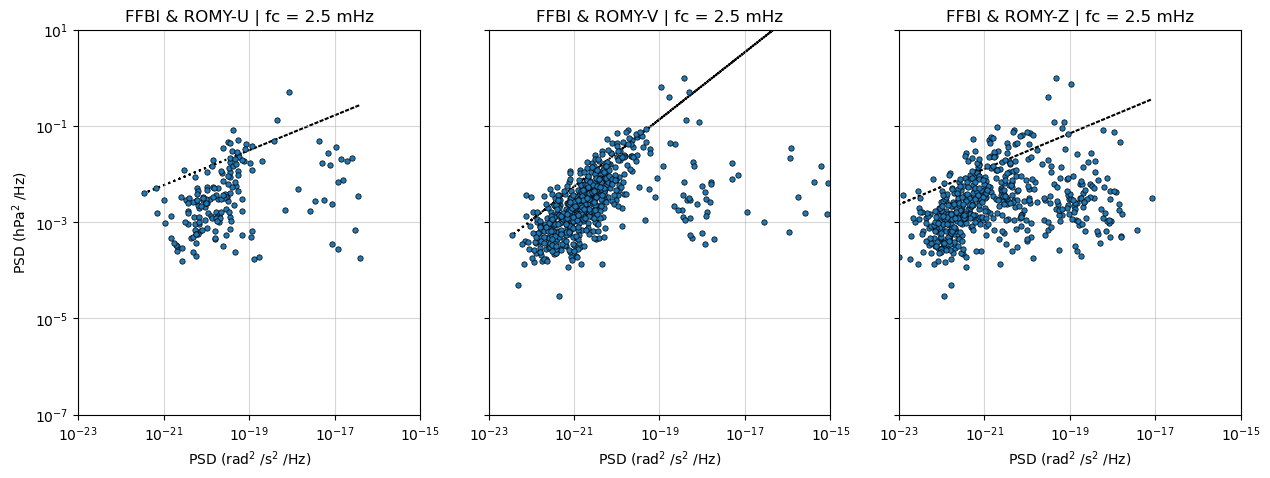

           dates  0.00315_x     0.00315_y
0    20230923_00   0.006078  2.979425e-20
1    20230923_01   0.012571  5.054780e-18
2    20230923_02   0.002729  4.064934e-20
3    20230923_03   0.002082  3.827112e-20
4    20230923_04   0.007250  1.141026e-18
..           ...        ...           ...
379  20231022_19   0.000140  2.223479e-14
380  20231022_20   0.000857  2.146251e-13
381  20231022_21   0.000295  1.219380e-13
382  20231022_22   0.000442  7.068311e-21
383  20231022_23   0.000883  2.785974e-21

[384 rows x 3 columns]
           dates  0.00315_x     0.00315_y
0    20230923_00   0.006078  2.979425e-20
1    20230923_01   0.012571  5.054780e-18
2    20230923_02   0.002729  4.064934e-20
3    20230923_03   0.002082  3.827112e-20
4    20230923_04   0.007250  1.141026e-18
..           ...        ...           ...
369  20231022_09   0.003134  2.791808e-21
370  20231022_10   0.011606  1.080349e-20
378  20231022_18   0.000475  8.755605e-18
382  20231022_22   0.000442  7.068311e-21
383  20231

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 3.15 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 3.15 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 3.15 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

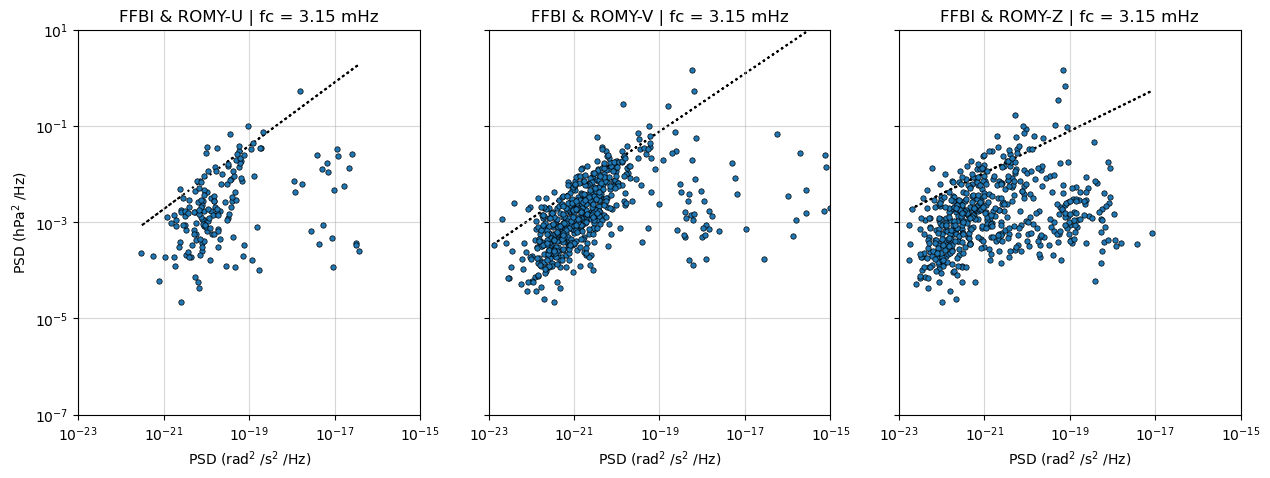

           dates   0.004_x       0.004_y
0    20230923_00  0.002956  1.531507e-20
1    20230923_01  0.001030  2.968717e-18
2    20230923_02  0.001010  2.227826e-20
3    20230923_03  0.001719  1.643341e-20
4    20230923_04  0.003127  9.541245e-19
..           ...       ...           ...
379  20231022_19  0.000104  4.707118e-14
380  20231022_20  0.000068  1.668626e-13
381  20231022_21  0.000386  1.196223e-13
382  20231022_22  0.000434  4.101599e-21
383  20231022_23  0.000310  7.157566e-21

[384 rows x 3 columns]
           dates   0.004_x       0.004_y
0    20230923_00  0.002956  1.531507e-20
1    20230923_01  0.001030  2.968717e-18
2    20230923_02  0.001010  2.227826e-20
3    20230923_03  0.001719  1.643341e-20
4    20230923_04  0.003127  9.541245e-19
..           ...       ...           ...
369  20231022_09  0.006893  1.773725e-20
370  20231022_10  0.004388  9.071161e-21
378  20231022_18  0.000094  8.608989e-18
382  20231022_22  0.000434  4.101599e-21
383  20231022_23  0.000310  7.157

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 4.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 4.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 4.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

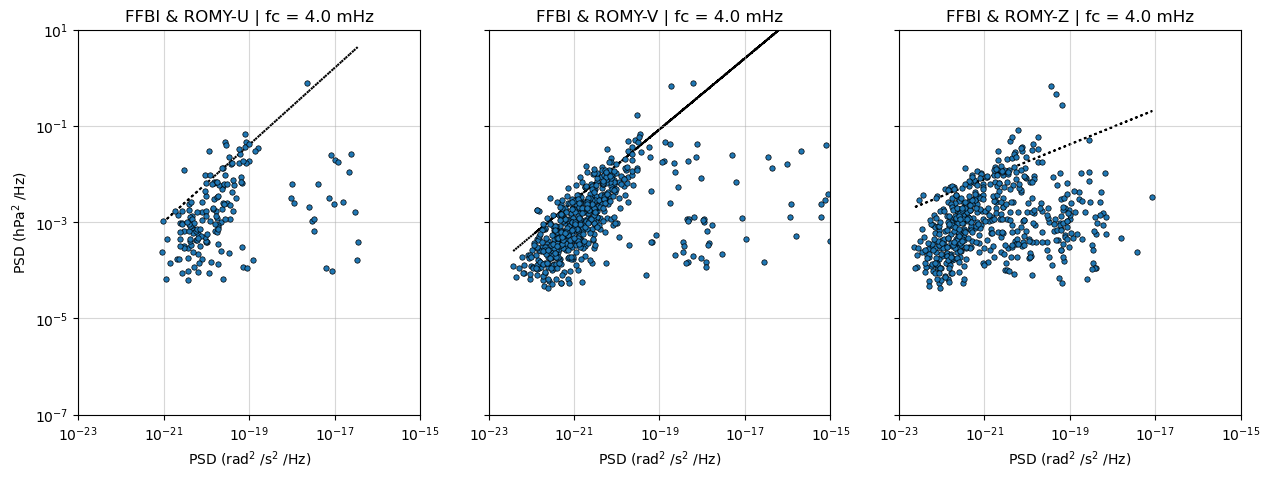

           dates   0.005_x       0.005_y
0    20230923_00  0.001885  1.443059e-20
1    20230923_01  0.001310  2.010100e-18
2    20230923_02  0.000898  1.342871e-20
3    20230923_03  0.005418  3.641170e-20
4    20230923_04  0.002539  6.837744e-19
..           ...       ...           ...
379  20231022_19  0.000089  2.155226e-13
380  20231022_20  0.000107  1.253455e-13
381  20231022_21  0.000400  4.042648e-14
382  20231022_22  0.000148  6.692299e-21
383  20231022_23  0.000414  4.399934e-21

[384 rows x 3 columns]
           dates   0.005_x       0.005_y
0    20230923_00  0.001885  1.443059e-20
1    20230923_01  0.001310  2.010100e-18
2    20230923_02  0.000898  1.342871e-20
3    20230923_03  0.005418  3.641170e-20
4    20230923_04  0.002539  6.837744e-19
..           ...       ...           ...
369  20231022_09  0.006942  2.378012e-20
370  20231022_10  0.008285  1.503587e-20
378  20231022_18  0.000019  8.217533e-18
382  20231022_22  0.000148  6.692299e-21
383  20231022_23  0.000414  4.399

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 5.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 5.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 5.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

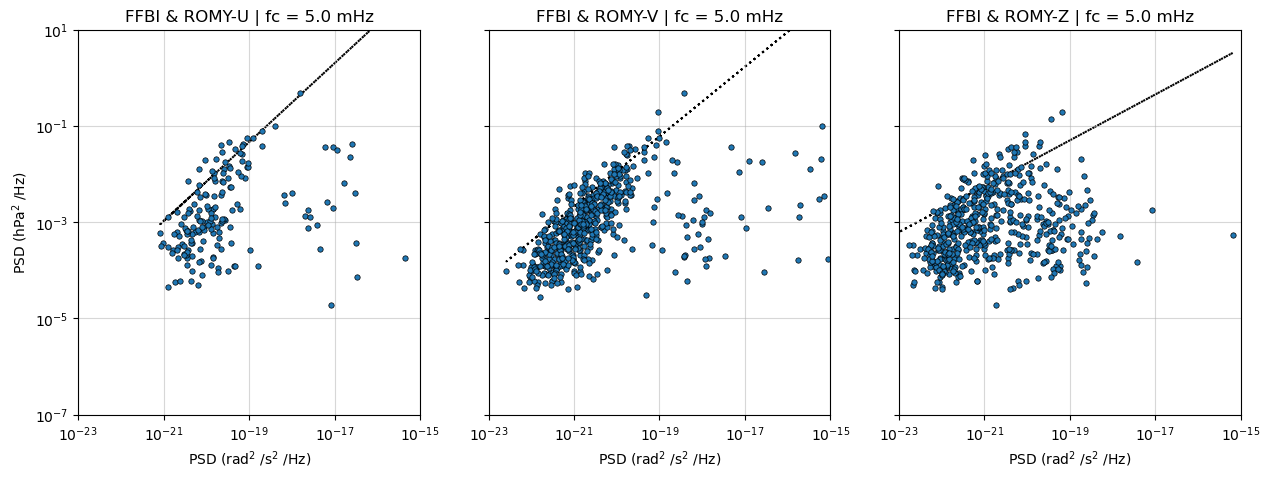

           dates  0.0063_x      0.0063_y
0    20230923_00  0.001587  7.774333e-21
1    20230923_01  0.000975  1.408616e-18
2    20230923_02  0.001056  7.954371e-21
3    20230923_03  0.001935  3.338010e-20
4    20230923_04  0.005729  3.311995e-19
..           ...       ...           ...
379  20231022_19  0.000069  5.977088e-14
380  20231022_20  0.000031  5.207807e-14
381  20231022_21  0.000148  6.005544e-14
382  20231022_22  0.000082  1.532293e-19
383  20231022_23  0.000341  2.312049e-19

[384 rows x 3 columns]
           dates  0.0063_x      0.0063_y
0    20230923_00  0.001587  7.774333e-21
1    20230923_01  0.000975  1.408616e-18
2    20230923_02  0.001056  7.954371e-21
3    20230923_03  0.001935  3.338010e-20
4    20230923_04  0.005729  3.311995e-19
..           ...       ...           ...
369  20231022_09  0.007928  4.715055e-20
370  20231022_10  0.025137  7.503144e-20
378  20231022_18  0.000050  7.749800e-18
382  20231022_22  0.000082  1.532293e-19
383  20231022_23  0.000341  2.312

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 6.3 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 6.3 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 6.3 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

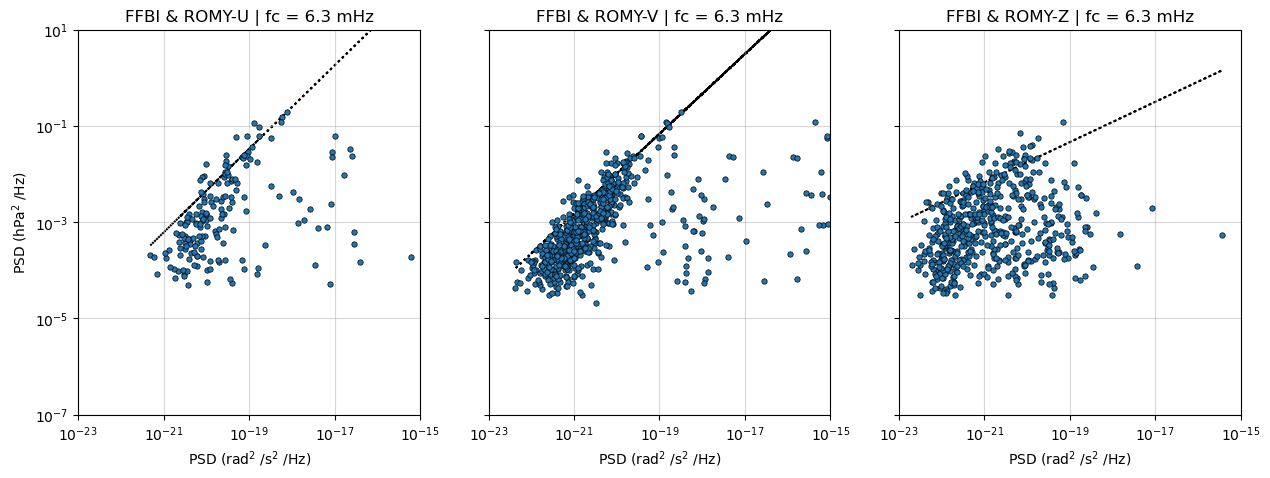

           dates   0.008_x       0.008_y
0    20230923_00  0.000775  5.276954e-21
1    20230923_01  0.002517  9.392651e-19
2    20230923_02  0.001648  1.768700e-20
3    20230923_03  0.002371  1.542754e-20
4    20230923_04  0.005931  5.418584e-19
..           ...       ...           ...
379  20231022_19  0.000030  8.229986e-14
380  20231022_20  0.000027  2.009703e-13
381  20231022_21  0.000133  1.272809e-13
382  20231022_22  0.000038  9.948579e-20
383  20231022_23  0.000206  4.936942e-20

[384 rows x 3 columns]
           dates   0.008_x       0.008_y
0    20230923_00  0.000775  5.276954e-21
1    20230923_01  0.002517  9.392651e-19
2    20230923_02  0.001648  1.768700e-20
3    20230923_03  0.002371  1.542754e-20
4    20230923_04  0.005931  5.418584e-19
..           ...       ...           ...
369  20231022_09  0.009250  8.330343e-19
370  20231022_10  0.004021  8.455093e-19
378  20231022_18  0.000024  6.283544e-18
382  20231022_22  0.000038  9.948579e-20
383  20231022_23  0.000206  4.936

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 8.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 8.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 8.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

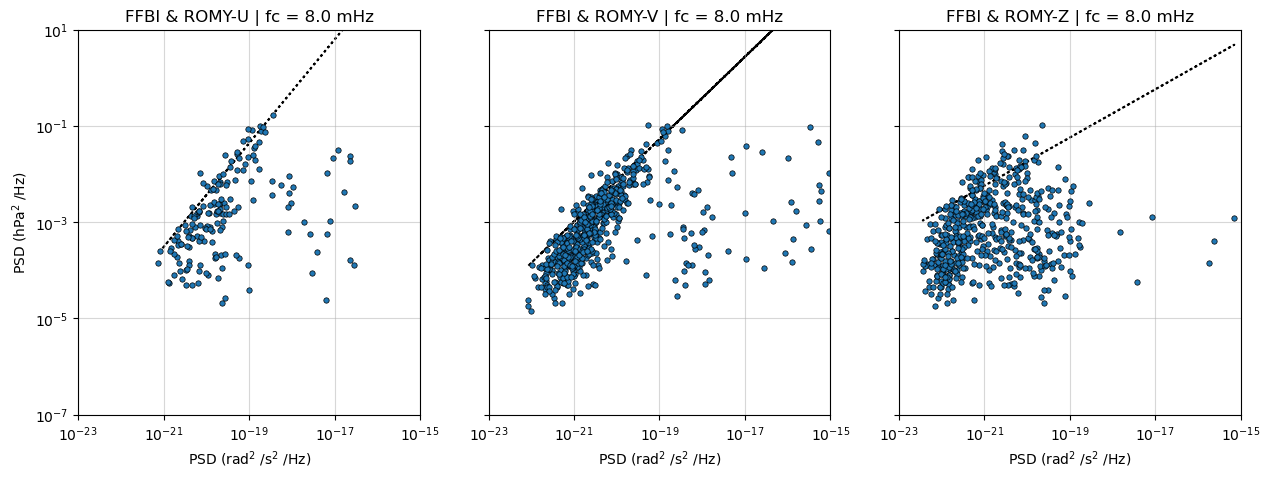

           dates    0.01_x        0.01_y
0    20230923_00  0.002301  1.086179e-20
1    20230923_01  0.002075  6.742984e-19
2    20230923_02  0.001473  3.190849e-20
3    20230923_03  0.002246  3.035676e-20
4    20230923_04  0.002766  4.039299e-19
..           ...       ...           ...
379  20231022_19  0.000023  9.552187e-14
380  20231022_20  0.000032  2.019670e-13
381  20231022_21  0.000093  1.522276e-13
382  20231022_22  0.000038  4.045859e-21
383  20231022_23  0.000145  4.406637e-21

[384 rows x 3 columns]
           dates    0.01_x        0.01_y
0    20230923_00  0.002301  1.086179e-20
1    20230923_01  0.002075  6.742984e-19
2    20230923_02  0.001473  3.190849e-20
3    20230923_03  0.002246  3.035676e-20
4    20230923_04  0.002766  4.039299e-19
..           ...       ...           ...
369  20231022_09  0.012757  2.947673e-20
370  20231022_10  0.010150  6.277205e-20
378  20231022_18  0.000035  4.676092e-18
382  20231022_22  0.000038  4.045859e-21
383  20231022_23  0.000145  4.406

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 10.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 10.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 10.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

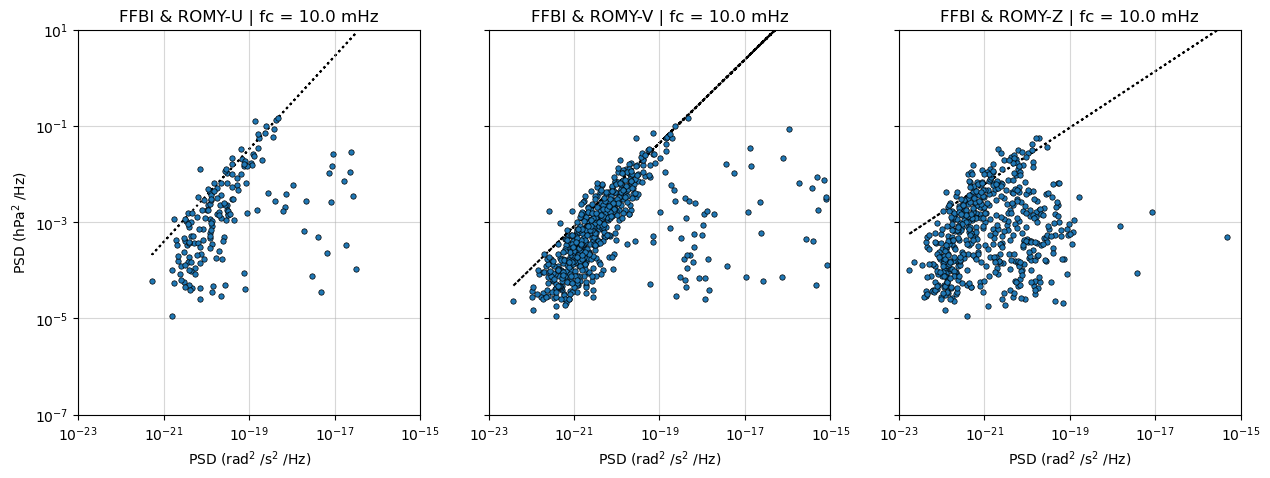

           dates  0.0125_x      0.0125_y
0    20230923_00  0.003387  5.934207e-21
1    20230923_01  0.002338  5.847524e-19
2    20230923_02  0.001322  1.498422e-20
3    20230923_03  0.004471  3.704068e-20
4    20230923_04  0.003479  4.461187e-19
..           ...       ...           ...
379  20231022_19  0.000036  1.637488e-13
380  20231022_20  0.000009  1.292535e-13
381  20231022_21  0.000089  1.190513e-13
382  20231022_22  0.000041  9.828540e-19
383  20231022_23  0.000038  1.307497e-18

[384 rows x 3 columns]
           dates  0.0125_x      0.0125_y
0    20230923_00  0.003387  5.934207e-21
1    20230923_01  0.002338  5.847524e-19
2    20230923_02  0.001322  1.498422e-20
3    20230923_03  0.004471  3.704068e-20
4    20230923_04  0.003479  4.461187e-19
..           ...       ...           ...
369  20231022_09  0.005728  4.300076e-20
370  20231022_10  0.005200  6.857601e-20
378  20231022_18  0.000012  3.726826e-18
382  20231022_22  0.000041  9.828540e-19
383  20231022_23  0.000038  1.307

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 12.5 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 12.5 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 12.5 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

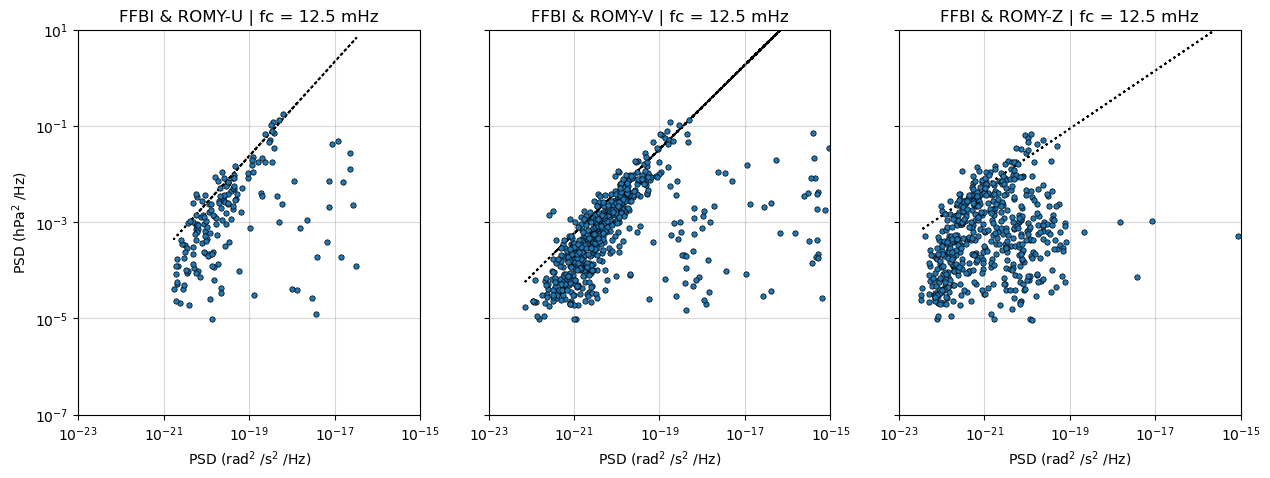

           dates   0.016_x       0.016_y
0    20230923_00  0.002637  1.929121e-20
1    20230923_01  0.001407  5.523004e-19
2    20230923_02  0.001141  1.247931e-20
3    20230923_03  0.002751  5.625071e-20
4    20230923_04  0.002368  3.271645e-19
..           ...       ...           ...
379  20231022_19  0.000013  1.267045e-13
380  20231022_20  0.000006  7.479020e-14
381  20231022_21  0.000033  1.990260e-13
382  20231022_22  0.000011  2.205890e-19
383  20231022_23  0.000020  1.565637e-20

[384 rows x 3 columns]
           dates   0.016_x       0.016_y
0    20230923_00  0.002637  1.929121e-20
1    20230923_01  0.001407  5.523004e-19
2    20230923_02  0.001141  1.247931e-20
3    20230923_03  0.002751  5.625071e-20
4    20230923_04  0.002368  3.271645e-19
..           ...       ...           ...
369  20231022_09  0.003912  3.689749e-19
370  20231022_10  0.004397  5.521289e-19
378  20231022_18  0.000014  5.042604e-18
382  20231022_22  0.000011  2.205890e-19
383  20231022_23  0.000020  1.565

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 16.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 16.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 16.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

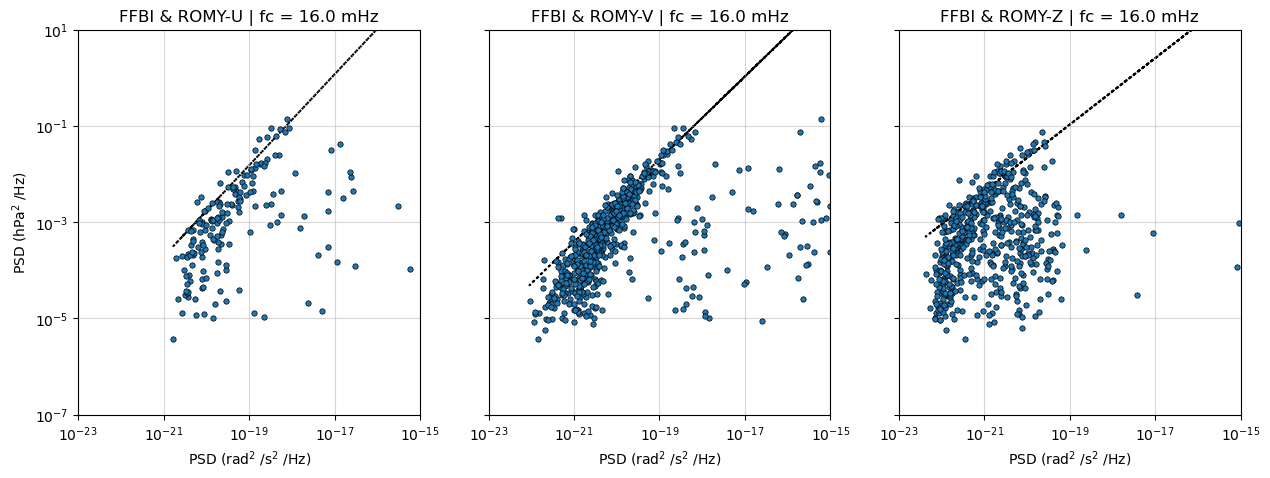

           dates    0.02_x        0.02_y
0    20230923_00  0.001499  2.643532e-20
1    20230923_01  0.000893  4.561373e-19
2    20230923_02  0.000863  1.772291e-20
3    20230923_03  0.001525  2.047705e-20
4    20230923_04  0.002553  3.430892e-19
..           ...       ...           ...
379  20231022_19  0.000007  6.990181e-14
380  20231022_20  0.000004  8.698007e-14
381  20231022_21  0.000019  1.125159e-13
382  20231022_22  0.000011  4.150880e-19
383  20231022_23  0.000023  4.119144e-19

[384 rows x 3 columns]
           dates    0.02_x        0.02_y
0    20230923_00  0.001499  2.643532e-20
1    20230923_01  0.000893  4.561373e-19
2    20230923_02  0.000863  1.772291e-20
3    20230923_03  0.001525  2.047705e-20
4    20230923_04  0.002553  3.430892e-19
..           ...       ...           ...
369  20231022_09  0.004103  6.765852e-20
370  20231022_10  0.003981  7.577335e-20
378  20231022_18  0.000005  2.880015e-18
382  20231022_22  0.000011  4.150880e-19
383  20231022_23  0.000023  4.119

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 20.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 20.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 20.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

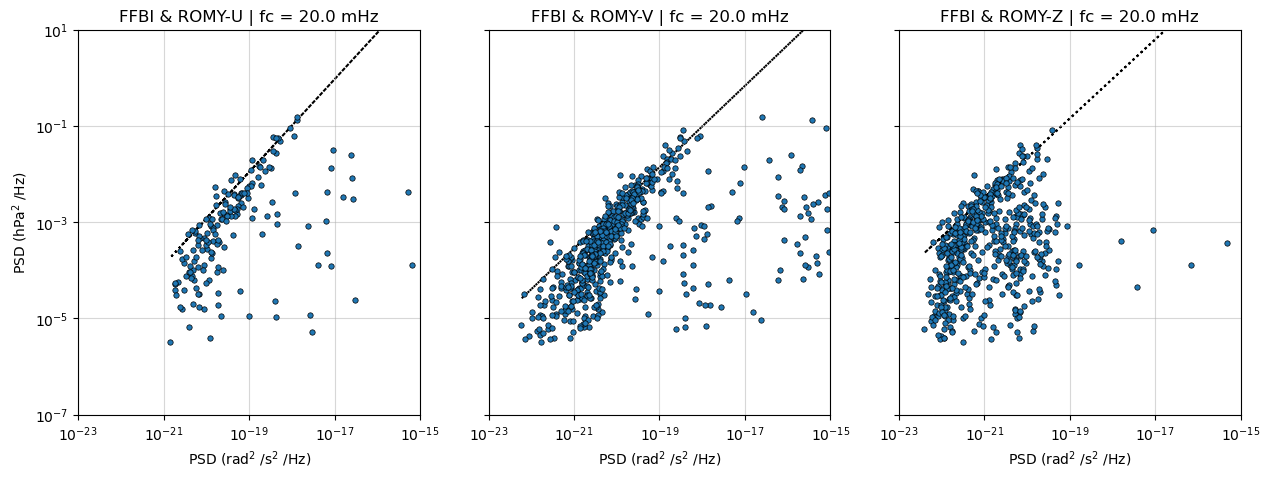

           dates   0.025_x       0.025_y
0    20230923_00  0.002027  3.047764e-20
1    20230923_01  0.000505  3.782878e-19
2    20230923_02  0.000653  3.583099e-20
3    20230923_03  0.001282  7.104361e-20
4    20230923_04  0.001692  4.151758e-19
..           ...       ...           ...
379  20231022_19  0.000003  9.159936e-14
380  20231022_20  0.000003  1.131316e-13
381  20231022_21  0.000013  9.658716e-14
382  20231022_22  0.000004  1.918654e-19
383  20231022_23  0.000006  2.650234e-19

[384 rows x 3 columns]
           dates   0.025_x       0.025_y
0    20230923_00  0.002027  3.047764e-20
1    20230923_01  0.000505  3.782878e-19
2    20230923_02  0.000653  3.583099e-20
3    20230923_03  0.001282  7.104361e-20
4    20230923_04  0.001692  4.151758e-19
..           ...       ...           ...
369  20231022_09  0.003650  2.826465e-19
370  20231022_10  0.002653  2.621124e-19
378  20231022_18  0.000002  4.434014e-19
382  20231022_22  0.000004  1.918654e-19
383  20231022_23  0.000006  2.650

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 25.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 25.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 25.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

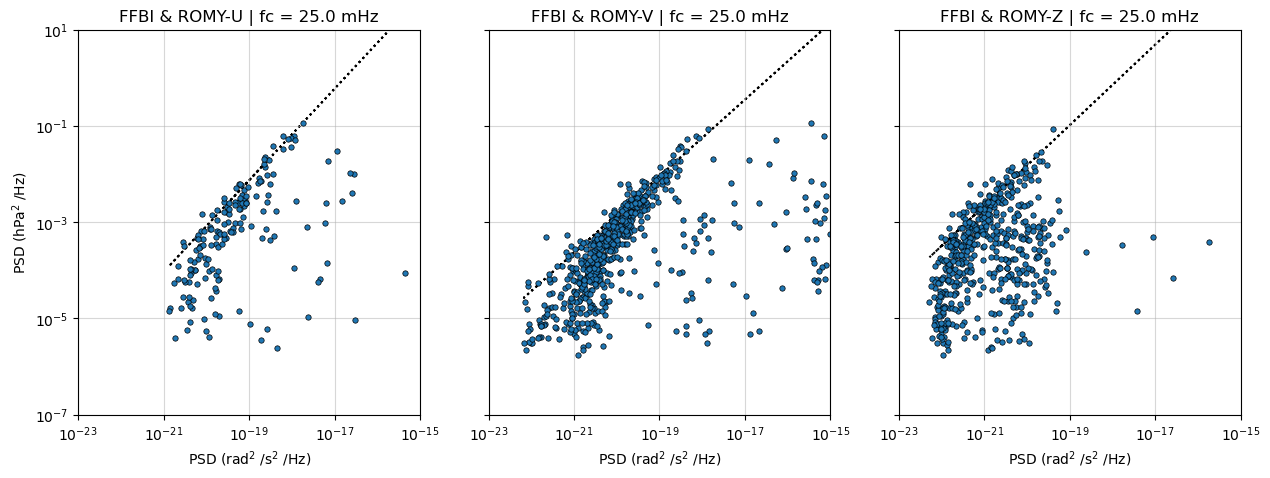

           dates  0.0315_x      0.0315_y
0    20230923_00  0.001062  3.812844e-20
1    20230923_01  0.000769  2.770352e-19
2    20230923_02  0.000387  2.256609e-20
3    20230923_03  0.001045  5.641975e-20
4    20230923_04  0.001742  4.103713e-19
..           ...       ...           ...
379  20231022_19  0.000003  1.122488e-13
380  20231022_20  0.000002  8.168222e-14
381  20231022_21  0.000002  1.258289e-13
382  20231022_22  0.000001  4.788525e-19
383  20231022_23  0.000002  4.856716e-19

[384 rows x 3 columns]
           dates  0.0315_x      0.0315_y
0    20230923_00  0.001062  3.812844e-20
1    20230923_01  0.000769  2.770352e-19
2    20230923_02  0.000387  2.256609e-20
3    20230923_03  0.001045  5.641975e-20
4    20230923_04  0.001742  4.103713e-19
..           ...       ...           ...
369  20231022_09  0.002991  2.415171e-19
370  20231022_10  0.001923  3.034907e-19
378  20231022_18  0.000002  8.260453e-19
382  20231022_22  0.000001  4.788525e-19
383  20231022_23  0.000002  4.856

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 31.5 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 31.5 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 31.5 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

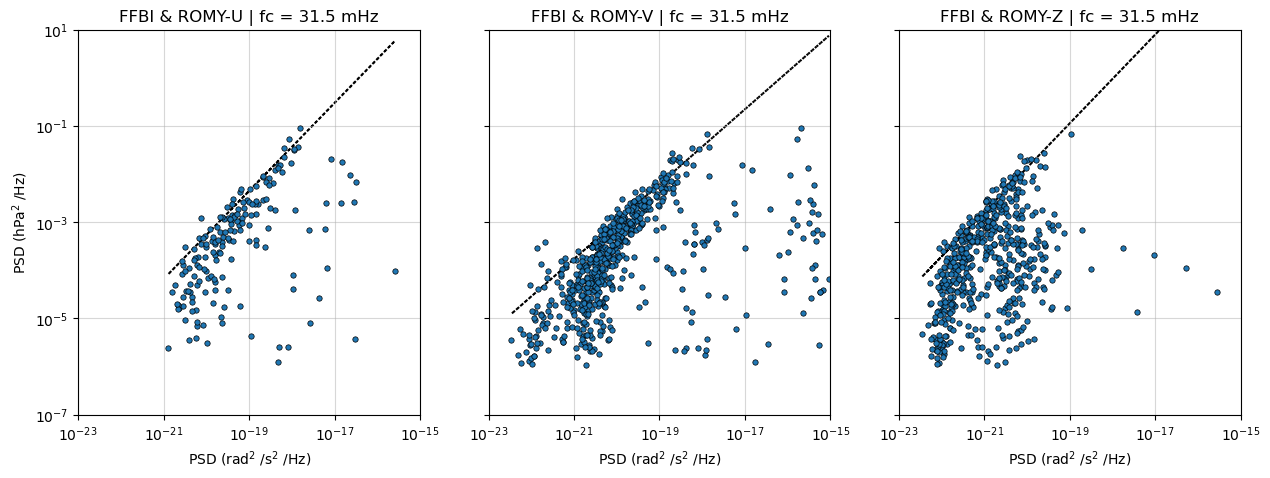

           dates    0.04_x        0.04_y
0    20230923_00  0.000800  3.767422e-20
1    20230923_01  0.000425  2.971115e-19
2    20230923_02  0.000270  1.756958e-20
3    20230923_03  0.000658  5.794556e-20
4    20230923_04  0.001322  2.766057e-19
..           ...       ...           ...
379  20231022_19  0.000002  1.083463e-13
380  20231022_20  0.000001  1.557443e-13
381  20231022_21  0.000001  1.350154e-13
382  20231022_22  0.000001  2.168943e-20
383  20231022_23  0.000001  2.032943e-20

[384 rows x 3 columns]
           dates    0.04_x        0.04_y
0    20230923_00  0.000800  3.767422e-20
1    20230923_01  0.000425  2.971115e-19
2    20230923_02  0.000270  1.756958e-20
3    20230923_03  0.000658  5.794556e-20
4    20230923_04  0.001322  2.766057e-19
..           ...       ...           ...
369  20231022_09  0.001660  2.813864e-19
370  20231022_10  0.001947  2.439536e-19
378  20231022_18  0.000001  7.301616e-19
382  20231022_22  0.000001  2.168943e-20
383  20231022_23  0.000001  2.032

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 40.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 40.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 40.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

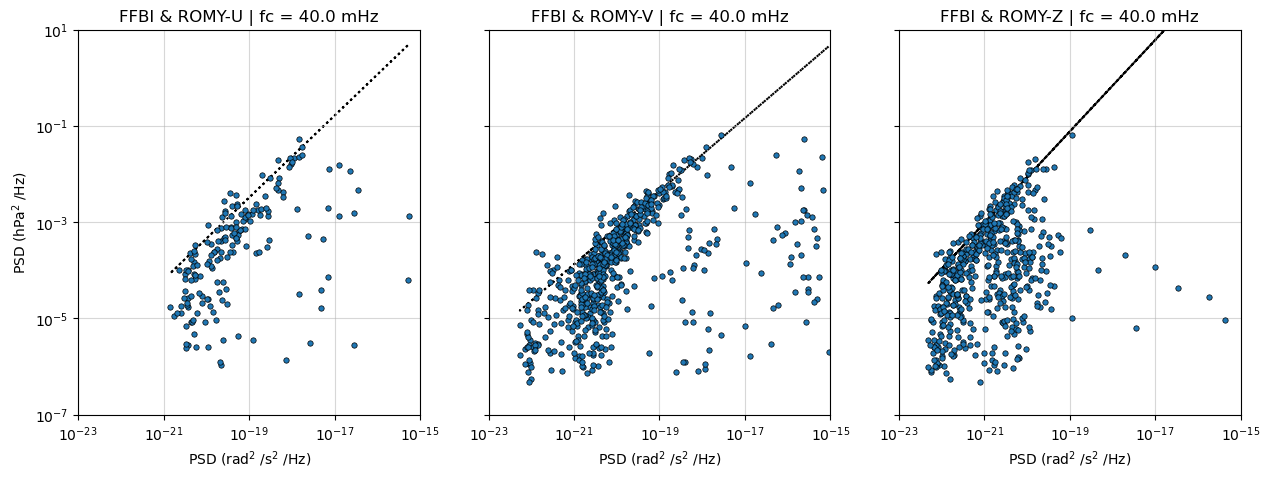

           dates        0.05_x        0.05_y
0    20230923_00  8.346790e-04  6.356982e-20
1    20230923_01  4.229083e-04  3.091918e-19
2    20230923_02  3.172501e-04  2.427251e-20
3    20230923_03  5.832745e-04  7.257865e-20
4    20230923_04  7.508882e-04  2.439946e-19
..           ...           ...           ...
379  20231022_19  8.501477e-07  1.526139e-13
380  20231022_20  7.240722e-07  1.184270e-13
381  20231022_21  7.411401e-07  7.629001e-14
382  20231022_22  6.661771e-07  3.850753e-19
383  20231022_23  7.725803e-07  4.049405e-19

[384 rows x 3 columns]
           dates        0.05_x        0.05_y
0    20230923_00  8.346790e-04  6.356982e-20
1    20230923_01  4.229083e-04  3.091918e-19
2    20230923_02  3.172501e-04  2.427251e-20
3    20230923_03  5.832745e-04  7.257865e-20
4    20230923_04  7.508882e-04  2.439946e-19
..           ...           ...           ...
369  20231022_09  1.506566e-03  4.020083e-19
370  20231022_10  1.490795e-03  2.741368e-19
378  20231022_18  8.732335e-07 

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 50.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 50.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 50.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

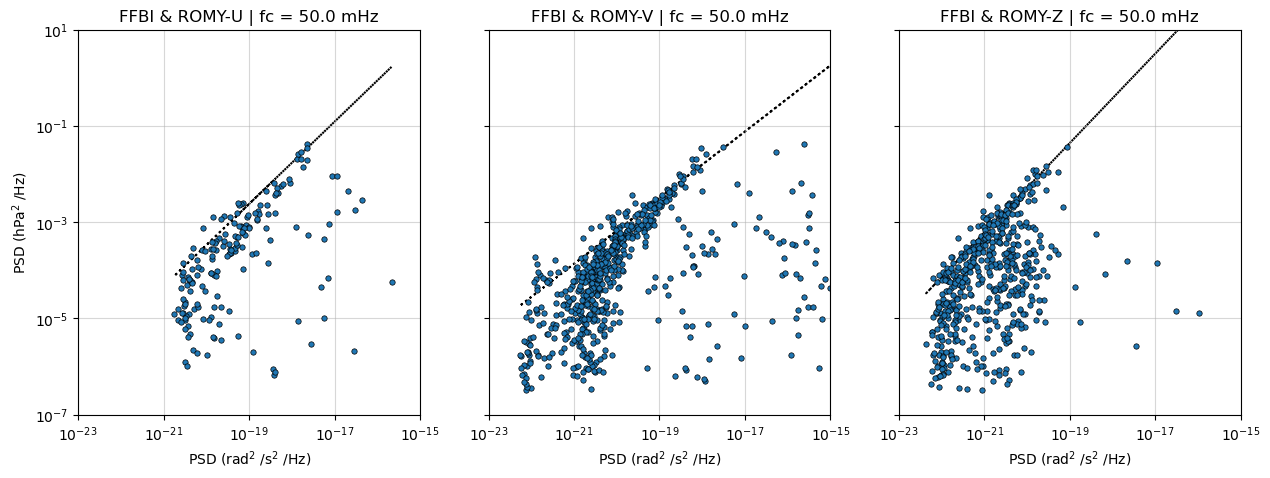

           dates       0.063_x       0.063_y
0    20230923_00  6.681170e-04  8.393989e-20
1    20230923_01  2.534113e-04  2.319722e-19
2    20230923_02  1.608076e-04  1.669354e-20
3    20230923_03  3.661967e-04  5.309779e-20
4    20230923_04  4.782094e-04  2.369870e-19
..           ...           ...           ...
379  20231022_19  8.163839e-07  1.256880e-13
380  20231022_20  6.443177e-07  7.779226e-14
381  20231022_21  3.480186e-07  1.353002e-13
382  20231022_22  2.567642e-07  3.359419e-19
383  20231022_23  6.591702e-07  3.559868e-19

[384 rows x 3 columns]
           dates       0.063_x       0.063_y
0    20230923_00  6.681170e-04  8.393989e-20
1    20230923_01  2.534113e-04  2.319722e-19
2    20230923_02  1.608076e-04  1.669354e-20
3    20230923_03  3.661967e-04  5.309779e-20
4    20230923_04  4.782094e-04  2.369870e-19
..           ...           ...           ...
369  20231022_09  1.188291e-03  2.312383e-19
370  20231022_10  1.439590e-03  2.752529e-19
378  20231022_18  4.560210e-07 

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 63.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 63.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 63.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

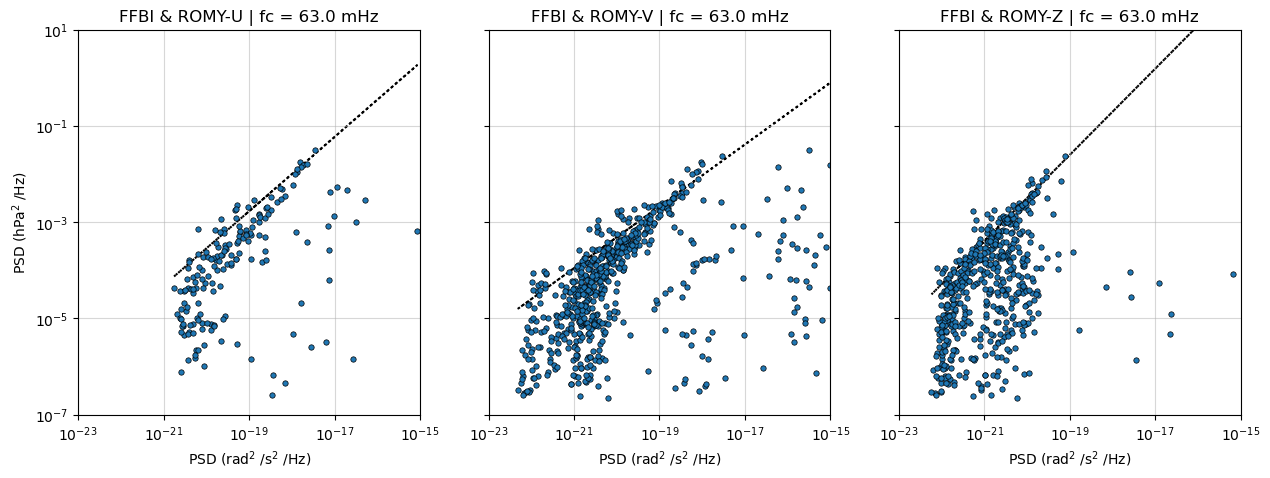

           dates        0.08_x        0.08_y
0    20230923_00  3.940802e-04  6.099104e-20
1    20230923_01  1.634034e-04  2.349426e-19
2    20230923_02  1.240303e-04  2.197442e-20
3    20230923_03  3.009644e-04  7.956173e-20
4    20230923_04  3.150705e-04  2.459678e-19
..           ...           ...           ...
379  20231022_19  5.309112e-07  1.154693e-13
380  20231022_20  3.445773e-07  8.936700e-14
381  20231022_21  2.492305e-07  8.819566e-14
382  20231022_22  2.280424e-07  2.598430e-19
383  20231022_23  3.784180e-07  2.562195e-19

[384 rows x 3 columns]
           dates        0.08_x        0.08_y
0    20230923_00  3.940802e-04  6.099104e-20
1    20230923_01  1.634034e-04  2.349426e-19
2    20230923_02  1.240303e-04  2.197442e-20
3    20230923_03  3.009644e-04  7.956173e-20
4    20230923_04  3.150705e-04  2.459678e-19
..           ...           ...           ...
369  20231022_09  8.355817e-04  2.313358e-19
370  20231022_10  8.932983e-04  3.077570e-19
378  20231022_18  4.059024e-07 

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 80.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 80.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 80.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

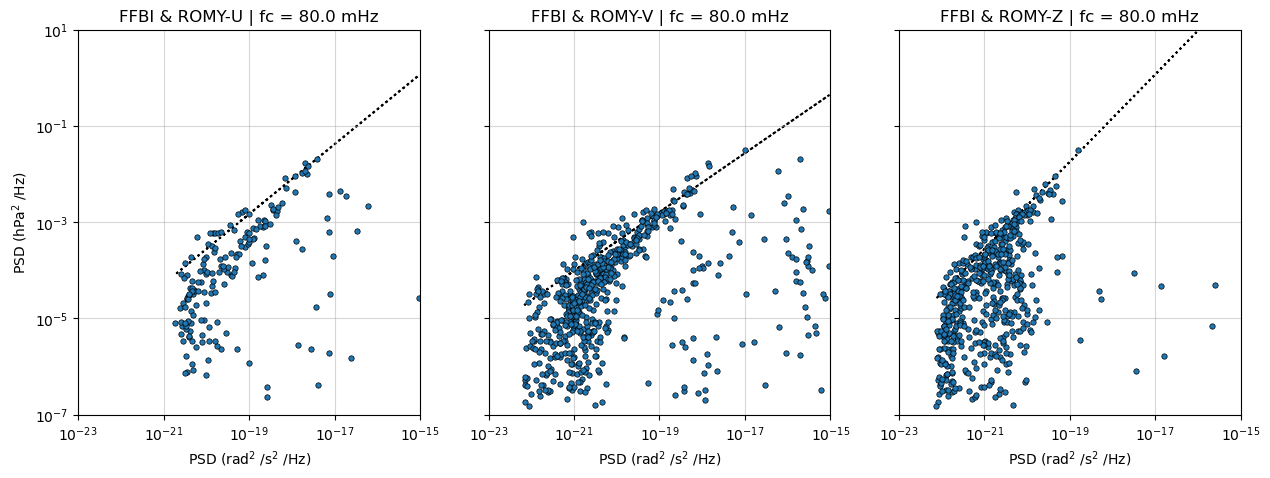

           dates         0.1_x         0.1_y
0    20230923_00  3.619650e-04  6.220585e-20
1    20230923_01  1.307152e-04  2.070321e-19
2    20230923_02  1.125761e-04  1.908149e-20
3    20230923_03  1.795337e-04  4.301200e-20
4    20230923_04  2.850199e-04  2.004567e-19
..           ...           ...           ...
379  20231022_19  3.401135e-07  1.142415e-13
380  20231022_20  2.306418e-07  9.241365e-14
381  20231022_21  1.403120e-07  8.872201e-14
382  20231022_22  1.703795e-07  2.600624e-19
383  20231022_23  2.966487e-07  2.906603e-19

[384 rows x 3 columns]
           dates         0.1_x         0.1_y
0    20230923_00  3.619650e-04  6.220585e-20
1    20230923_01  1.307152e-04  2.070321e-19
2    20230923_02  1.125761e-04  1.908149e-20
3    20230923_03  1.795337e-04  4.301200e-20
4    20230923_04  2.850199e-04  2.004567e-19
..           ...           ...           ...
369  20231022_09  7.435490e-04  2.461965e-19
370  20231022_10  9.180252e-04  2.141987e-19
378  20231022_18  2.710184e-07 

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 100.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 100.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 100.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

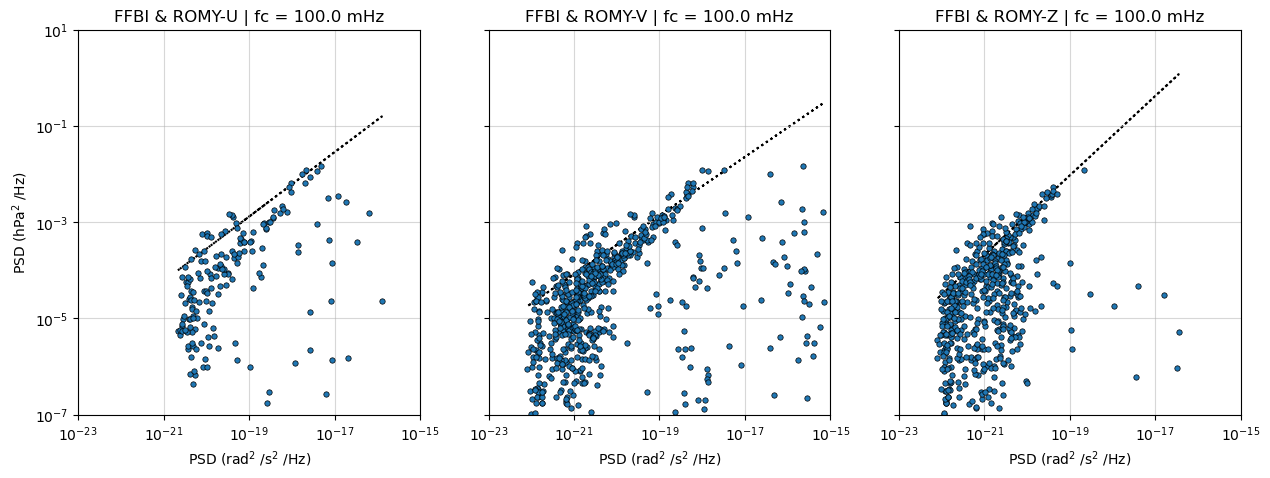

           dates       0.125_x       0.125_y
0    20230923_00  2.625402e-04  3.173442e-19
1    20230923_01  8.110334e-05  5.812717e-19
2    20230923_02  7.763474e-05  3.084078e-19
3    20230923_03  1.405477e-04  2.230549e-19
4    20230923_04  2.116137e-04  3.322873e-19
..           ...           ...           ...
379  20231022_19  2.712926e-07  8.545622e-14
380  20231022_20  1.820737e-07  1.230088e-13
381  20231022_21  1.602594e-07  8.993746e-14
382  20231022_22  1.199218e-07  2.589587e-19
383  20231022_23  2.172390e-07  2.197003e-19

[384 rows x 3 columns]
           dates       0.125_x       0.125_y
0    20230923_00  2.625402e-04  3.173442e-19
1    20230923_01  8.110334e-05  5.812717e-19
2    20230923_02  7.763474e-05  3.084078e-19
3    20230923_03  1.405477e-04  2.230549e-19
4    20230923_04  2.116137e-04  3.322873e-19
..           ...           ...           ...
369  20231022_09  5.276406e-04  2.362131e-19
370  20231022_10  9.498062e-04  2.733539e-19
378  20231022_18  1.933217e-07 

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 125.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 125.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 125.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

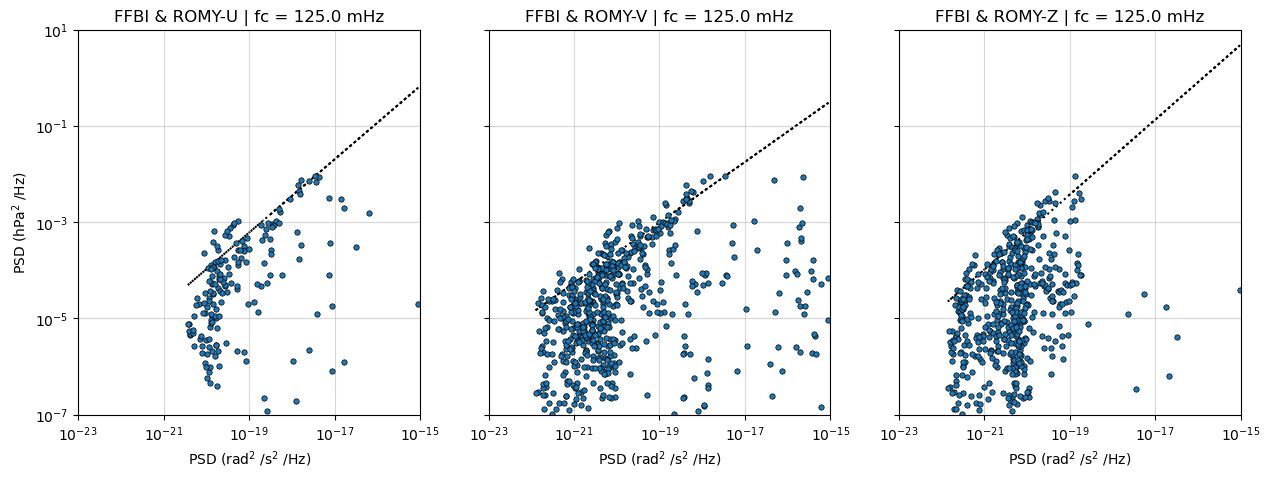

           dates    0.16_x        0.16_y
0    20230923_00  0.000165  1.276862e-19
1    20230923_01  0.000085  3.058306e-19
2    20230923_02  0.000049  8.101525e-20
3    20230923_03  0.000090  8.705686e-20
4    20230923_04  0.000096  2.334269e-19
..           ...       ...           ...
379  20231022_19  0.000002  1.159735e-13
380  20231022_20  0.000002  1.062048e-13
381  20231022_21  0.000001  1.051859e-13
382  20231022_22  0.000001  3.021232e-19
383  20231022_23  0.000001  2.575876e-19

[384 rows x 3 columns]
           dates    0.16_x        0.16_y
0    20230923_00  0.000165  1.276862e-19
1    20230923_01  0.000085  3.058306e-19
2    20230923_02  0.000049  8.101525e-20
3    20230923_03  0.000090  8.705686e-20
4    20230923_04  0.000096  2.334269e-19
..           ...       ...           ...
369  20231022_09  0.000300  2.617794e-19
370  20231022_10  0.000479  3.120137e-19
378  20231022_18  0.000002  1.111780e-18
382  20231022_22  0.000001  3.021232e-19
383  20231022_23  0.000001  2.575

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 160.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 160.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 160.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

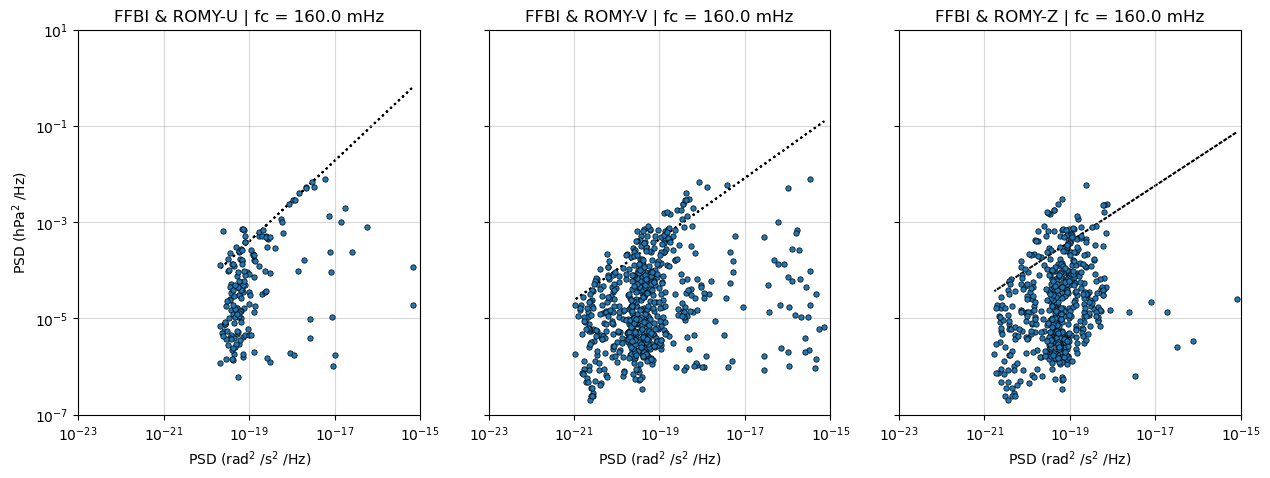

           dates     0.2_x         0.2_y
0    20230923_00  0.000131  5.377865e-20
1    20230923_01  0.000046  1.884484e-19
2    20230923_02  0.000042  3.589831e-20
3    20230923_03  0.000068  3.628806e-20
4    20230923_04  0.000058  2.023617e-19
..           ...       ...           ...
379  20231022_19  0.000007  1.045402e-13
380  20231022_20  0.000008  1.117272e-13
381  20231022_21  0.000007  8.681336e-14
382  20231022_22  0.000006  2.238741e-19
383  20231022_23  0.000005  2.095232e-19

[384 rows x 3 columns]
           dates     0.2_x         0.2_y
0    20230923_00  0.000131  5.377865e-20
1    20230923_01  0.000046  1.884484e-19
2    20230923_02  0.000042  3.589831e-20
3    20230923_03  0.000068  3.628806e-20
4    20230923_04  0.000058  2.023617e-19
..           ...       ...           ...
369  20231022_09  0.000286  1.860321e-19
370  20231022_10  0.000274  2.040774e-19
378  20231022_18  0.000007  1.194838e-18
382  20231022_22  0.000006  2.238741e-19
383  20231022_23  0.000005  2.095

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 200.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 200.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 200.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

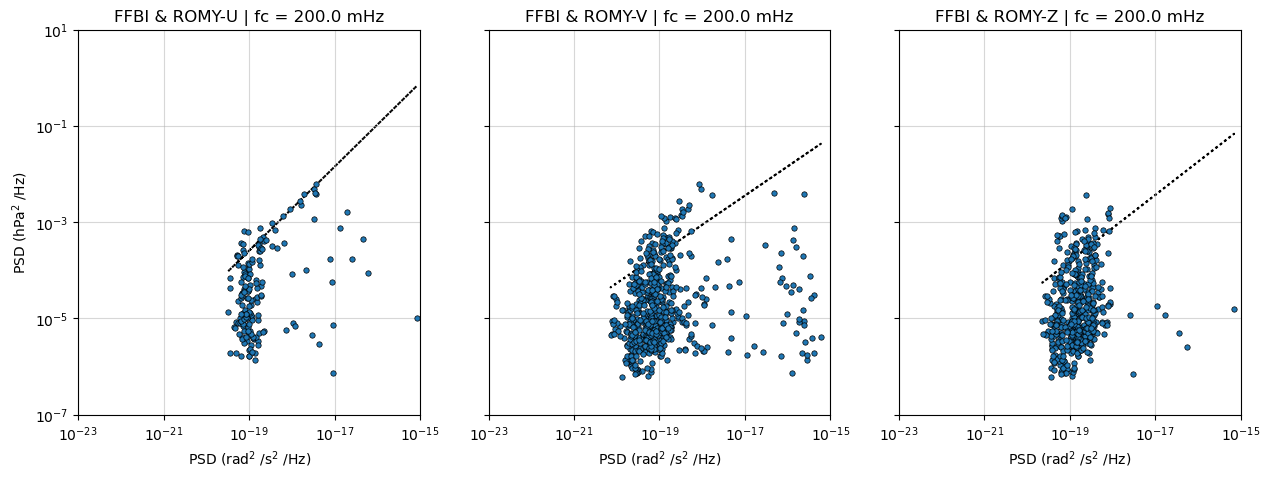

           dates    0.25_x        0.25_y
0    20230923_00  0.000106  9.242391e-20
1    20230923_01  0.000033  2.154885e-19
2    20230923_02  0.000039  6.727920e-20
3    20230923_03  0.000050  6.397691e-20
4    20230923_04  0.000060  2.283945e-19
..           ...       ...           ...
379  20231022_19  0.000003  1.008258e-13
380  20231022_20  0.000003  1.269898e-13
381  20231022_21  0.000003  9.294695e-14
382  20231022_22  0.000003  1.680777e-19
383  20231022_23  0.000003  1.682683e-19

[384 rows x 3 columns]
           dates    0.25_x        0.25_y
0    20230923_00  0.000106  9.242391e-20
1    20230923_01  0.000033  2.154885e-19
2    20230923_02  0.000039  6.727920e-20
3    20230923_03  0.000050  6.397691e-20
4    20230923_04  0.000060  2.283945e-19
..           ...       ...           ...
369  20231022_09  0.000159  1.620749e-19
370  20231022_10  0.000200  1.745308e-19
378  20231022_18  0.000003  1.069530e-18
382  20231022_22  0.000003  1.680777e-19
383  20231022_23  0.000003  1.682

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 250.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 250.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 250.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

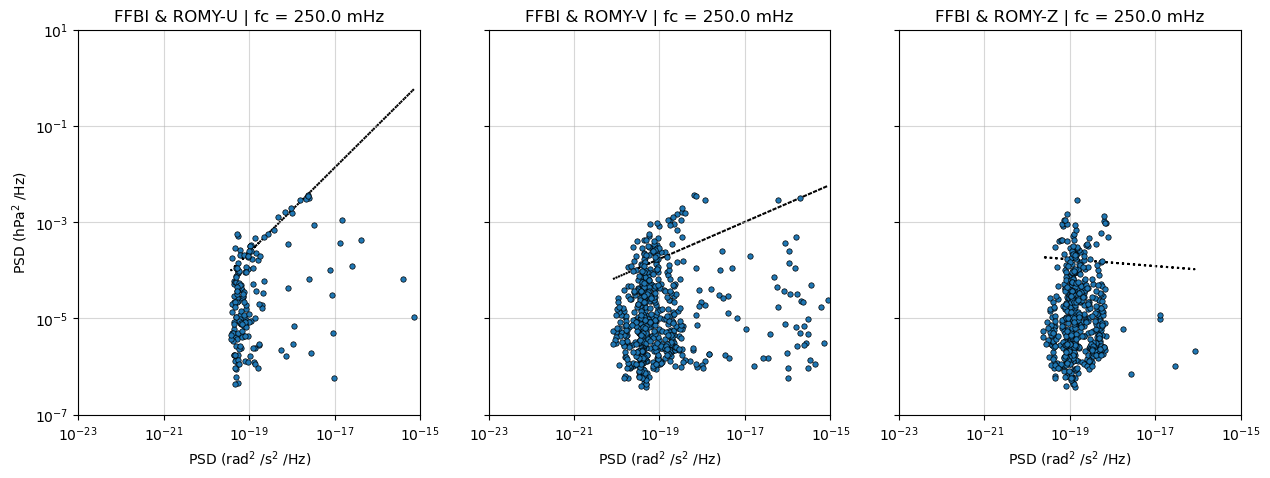

           dates       0.315_x       0.315_y
0    20230923_00  7.437795e-05  5.744384e-20
1    20230923_01  2.471513e-05  1.696459e-19
2    20230923_02  2.307613e-05  5.643454e-20
3    20230923_03  3.137029e-05  4.671067e-20
4    20230923_04  2.913977e-05  1.470058e-19
..           ...           ...           ...
379  20231022_19  7.903791e-07  1.178783e-13
380  20231022_20  7.910156e-07  1.090464e-13
381  20231022_21  8.078187e-07  9.670891e-14
382  20231022_22  7.420843e-07  1.172409e-19
383  20231022_23  7.660224e-07  1.274140e-19

[384 rows x 3 columns]
           dates       0.315_x       0.315_y
0    20230923_00  7.437795e-05  5.744384e-20
1    20230923_01  2.471513e-05  1.696459e-19
2    20230923_02  2.307613e-05  5.643454e-20
3    20230923_03  3.137029e-05  4.671067e-20
4    20230923_04  2.913977e-05  1.470058e-19
..           ...           ...           ...
369  20231022_09  1.172162e-04  1.327307e-19
370  20231022_10  1.553194e-04  1.066829e-19
378  20231022_18  7.062648e-07 

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 315.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 315.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 315.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

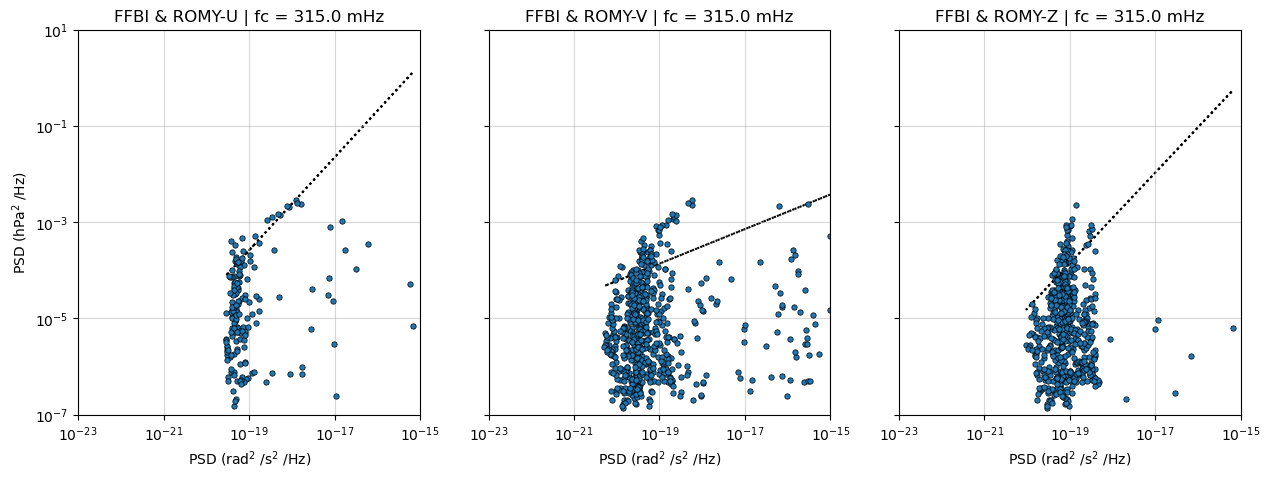

           dates         0.4_x         0.4_y
0    20230923_00  5.949291e-05  2.662652e-20
1    20230923_01  1.814139e-05  1.160779e-19
2    20230923_02  1.523963e-05  3.456238e-20
3    20230923_03  2.588615e-05  3.170856e-20
4    20230923_04  2.394734e-05  1.156657e-19
..           ...           ...           ...
379  20231022_19  2.600166e-07  1.135700e-13
380  20231022_20  2.259323e-07  1.282658e-13
381  20231022_21  2.345584e-07  1.052284e-13
382  20231022_22  2.317197e-07  4.433439e-20
383  20231022_23  2.302774e-07  4.501367e-20

[384 rows x 3 columns]
           dates         0.4_x         0.4_y
0    20230923_00  5.949291e-05  2.662652e-20
1    20230923_01  1.814139e-05  1.160779e-19
2    20230923_02  1.523963e-05  3.456238e-20
3    20230923_03  2.588615e-05  3.170856e-20
4    20230923_04  2.394734e-05  1.156657e-19
..           ...           ...           ...
369  20231022_09  7.228136e-05  5.378012e-20
370  20231022_10  9.613586e-05  5.043023e-20
378  20231022_18  2.540182e-07 

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 400.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 400.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 400.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

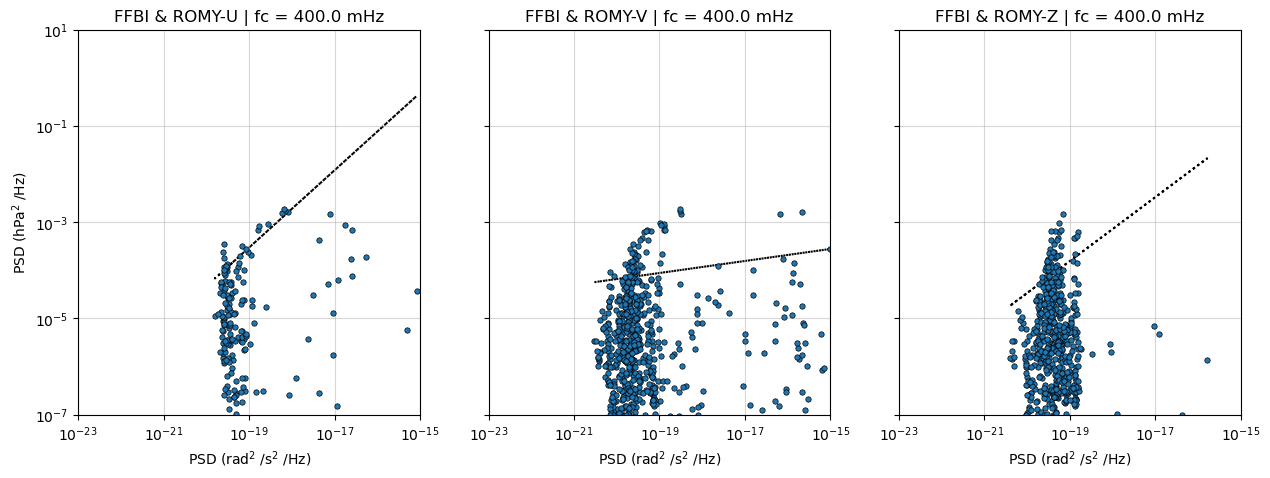

           dates         0.5_x         0.5_y
0    20230923_00  4.321320e-05  1.705756e-20
1    20230923_01  1.144809e-05  7.616056e-20
2    20230923_02  1.009787e-05  1.364384e-20
3    20230923_03  2.077662e-05  1.636430e-20
4    20230923_04  2.146121e-05  7.919662e-20
..           ...           ...           ...
379  20231022_19  1.013314e-07  1.224758e-13
380  20231022_20  9.121648e-08  1.189283e-13
381  20231022_21  8.425287e-08  9.388603e-14
382  20231022_22  8.143207e-08  1.364517e-20
383  20231022_23  1.124557e-07  1.409154e-20

[384 rows x 3 columns]
           dates         0.5_x         0.5_y
0    20230923_00  4.321320e-05  1.705756e-20
1    20230923_01  1.144809e-05  7.616056e-20
2    20230923_02  1.009787e-05  1.364384e-20
3    20230923_03  2.077662e-05  1.636430e-20
4    20230923_04  2.146121e-05  7.919662e-20
..           ...           ...           ...
369  20231022_09  4.861272e-05  1.795079e-20
370  20231022_10  5.927997e-05  2.186087e-20
378  20231022_18  9.308984e-08 

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 500.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 500.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 500.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

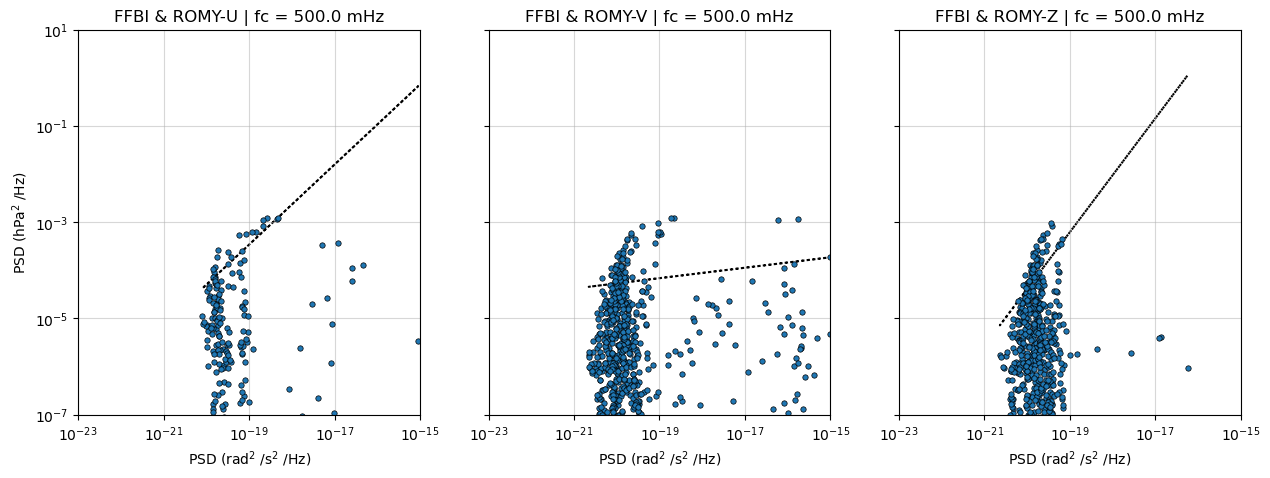

           dates        0.63_x        0.63_y
0    20230923_00  3.376698e-05  9.272955e-21
1    20230923_01  6.081962e-06  4.372296e-20
2    20230923_02  5.427968e-06  7.854233e-21
3    20230923_03  1.320658e-05  8.751272e-21
4    20230923_04  1.378575e-05  4.379010e-20
..           ...           ...           ...
379  20231022_19  5.025859e-08  1.073281e-13
380  20231022_20  3.778275e-08  1.071568e-13
381  20231022_21  4.118083e-08  9.827061e-14
382  20231022_22  3.553184e-08  2.417956e-20
383  20231022_23  5.196857e-08  2.291054e-20

[384 rows x 3 columns]
           dates        0.63_x        0.63_y
0    20230923_00  3.376698e-05  9.272955e-21
1    20230923_01  6.081962e-06  4.372296e-20
2    20230923_02  5.427968e-06  7.854233e-21
3    20230923_03  1.320658e-05  8.751272e-21
4    20230923_04  1.378575e-05  4.379010e-20
..           ...           ...           ...
369  20231022_09  3.020991e-05  1.924581e-20
370  20231022_10  4.039585e-05  1.711884e-20
378  20231022_18  4.165393e-08 

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 630.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 630.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 630.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

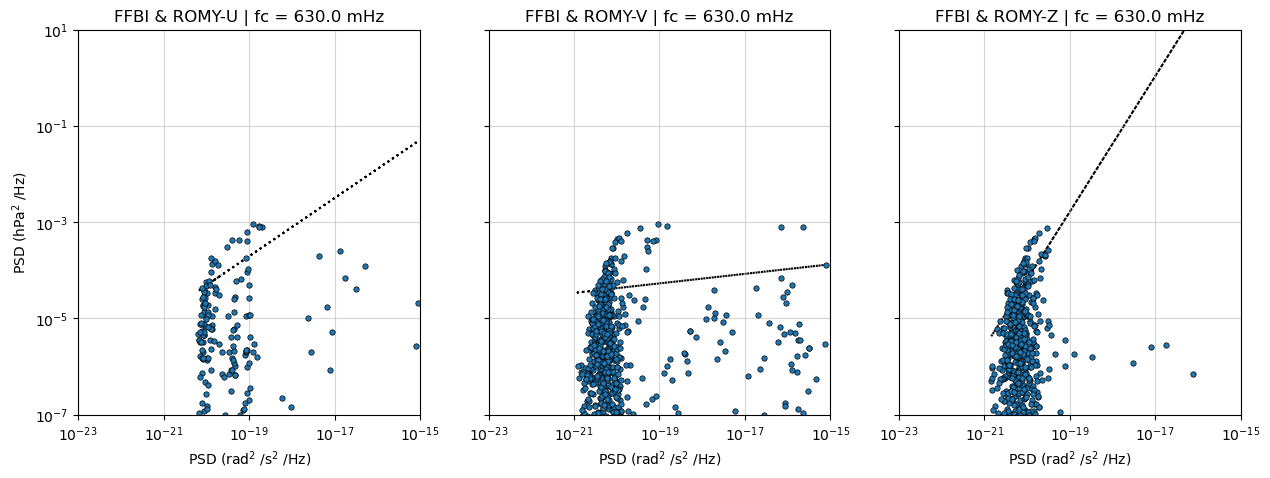

           dates         0.8_x         0.8_y
0    20230923_00  1.608663e-05  8.720808e-21
1    20230923_01  3.836132e-06  1.873961e-20
2    20230923_02  3.329447e-06  7.441879e-21
3    20230923_03  7.835593e-06  8.662617e-21
4    20230923_04  7.951731e-06  2.356061e-20
..           ...           ...           ...
379  20231022_19  2.447104e-08  1.000321e-13
380  20231022_20  1.868014e-08  1.122303e-13
381  20231022_21  1.841895e-08  1.007127e-13
382  20231022_22  1.899052e-08  2.128638e-20
383  20231022_23  2.893071e-08  1.897870e-20

[384 rows x 3 columns]
           dates         0.8_x         0.8_y
0    20230923_00  1.608663e-05  8.720808e-21
1    20230923_01  3.836132e-06  1.873961e-20
2    20230923_02  3.329447e-06  7.441879e-21
3    20230923_03  7.835593e-06  8.662617e-21
4    20230923_04  7.951731e-06  2.356061e-20
..           ...           ...           ...
369  20231022_09  2.079545e-05  1.755862e-20
370  20231022_10  2.699922e-05  1.357389e-20
378  20231022_18  1.894141e-08 

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 800.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 800.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 800.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

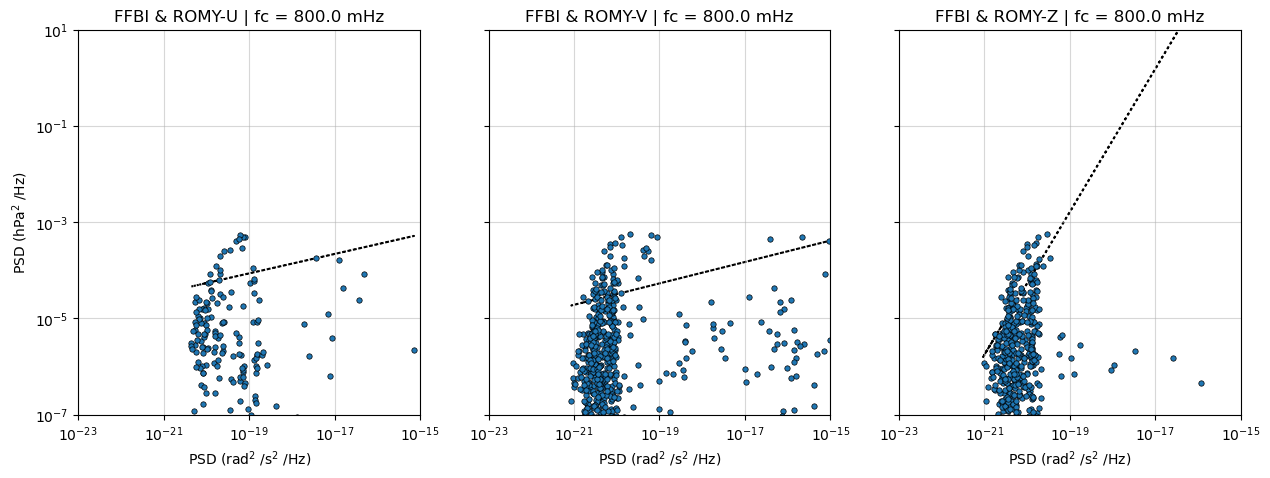

           dates         1.0_x         1.0_y
0    20230923_00  1.170058e-05  2.602825e-20
1    20230923_01  2.207094e-06  2.434378e-20
2    20230923_02  2.032981e-06  1.951348e-20
3    20230923_03  5.101245e-06  1.875639e-20
4    20230923_04  5.301498e-06  2.137259e-20
..           ...           ...           ...
379  20231022_19  1.855750e-08  1.024636e-13
380  20231022_20  1.430287e-08  1.160964e-13
381  20231022_21  1.436520e-08  9.661604e-14
382  20231022_22  1.483595e-08  9.675769e-21
383  20231022_23  2.204040e-08  8.205821e-21

[384 rows x 3 columns]
           dates         1.0_x         1.0_y
0    20230923_00  1.170058e-05  2.602825e-20
1    20230923_01  2.207094e-06  2.434378e-20
2    20230923_02  2.032981e-06  1.951348e-20
3    20230923_03  5.101245e-06  1.875639e-20
4    20230923_04  5.301498e-06  2.137259e-20
..           ...           ...           ...
369  20231022_09  1.408200e-05  1.404982e-20
370  20231022_10  1.792435e-05  1.551429e-20
378  20231022_18  1.431059e-08 

/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]
/tmp/ipykernel_6460/2451933868.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, newaxis]


(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

(1e-07, 10.0)

(1e-23, 1e-15)

Text(0.5, 0, 'PSD (rad$^2$ /s$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & ROMY-U | fc = 1000.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-V | fc = 1000.0 mHz')

Text(0.5, 1.0, 'FFBI & ROMY-Z | fc = 1000.0 mHz')

Text(0, 0.5, 'PSD (hPa$^2$ /Hz)')

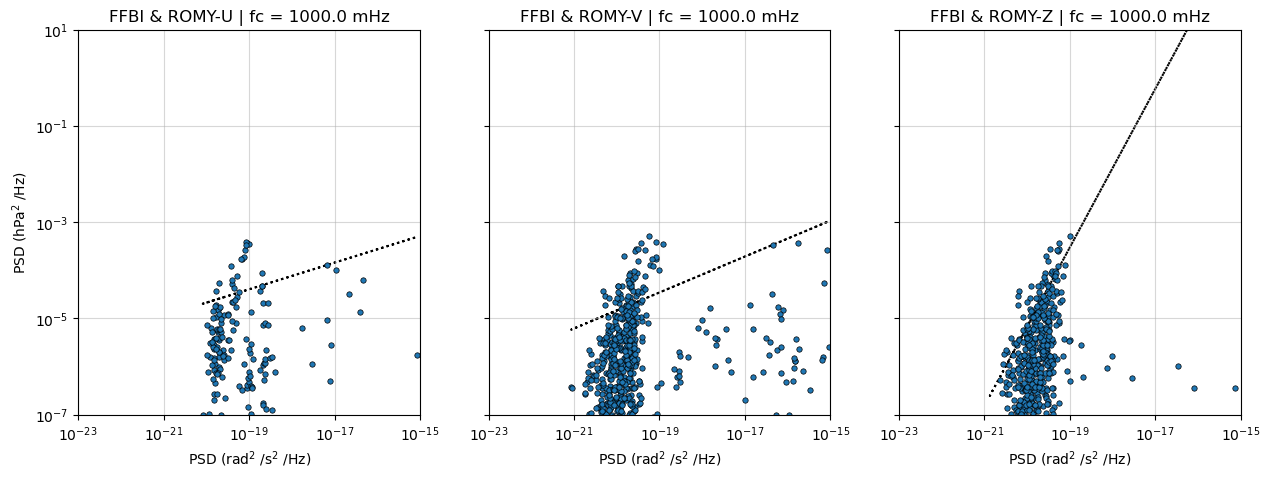

In [192]:
f_lower, f_upper, f_center = __get_octave_bands(1e-3, 1e0, fband_type="one-third-octave", plot=False)

N_bands = dat0.shape[1] - 1

bands = dat0.keys()[1:]

for _n, band in enumerate(bands):

    # if not _n == 11:
    #     continue

    _dat0 = dat0.loc[:, ["dates", band]]
    _dat1 = dat1.loc[:, ["dates", band]]
    _dat2 = dat2.loc[:, ["dates", band]]
    _dat3 = dat3.loc[:, ["dates", band]]

    ## join data frames based on dates and hour
    _df1 = pd.merge(left=_dat0, right=_dat1, how="inner", on="dates")
    _df2 = pd.merge(left=_dat0, right=_dat2, how="inner", on="dates")
    _df3 = pd.merge(left=_dat0, right=_dat3, how="inner", on="dates")

    # ## remove NaN values
    _df1.dropna(inplace=True)
    _df2.dropna(inplace=True)
    _df3.dropna(inplace=True)
    print(_df1)

    ## remove large values
    _df1 = _df1[_df1.iloc[:, 2] < 1e-15]
    _df2 = _df2[_df2.iloc[:, 2] < 1e-15]
    _df3 = _df3[_df3.iloc[:, 2] < 1e-15]
    print(_df1)

    ## reset the index
    _df1 = _df1.reset_index(drop=True)
    _df2 = _df2.reset_index(drop=True)
    _df3 = _df3.reset_index(drop=True)
    print(_df1)

    xx1, yy1 = np.log10(_df1.iloc[:, 2]), np.log10(_df1.iloc[:, 1])
    xx2, yy2 = np.log10(_df2.iloc[:, 2]), np.log10(_df2.iloc[:, 1])
    xx3, yy3 = np.log10(_df3.iloc[:, 2]), np.log10(_df3.iloc[:, 1])

    try:
        pre1 = __quantile_regression(xx1, yy1, quantiles=[0.1, 0.5, 0.9])
        pre2 = __quantile_regression(xx2, yy2, quantiles=[0.1, 0.5, 0.9])
        pre3 = __quantile_regression(xx3, yy3, quantiles=[0.1, 0.5, 0.9])

    except:
        continue

    if not _df.empty:

        fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)


        ax[0].scatter(10**xx1, 10**yy1, s=15, edgecolors="black", lw=0.5, zorder=2)
        ax[1].scatter(10**xx2, 10**yy2, s=15, edgecolors="black", lw=0.5, zorder=2)
        ax[2].scatter(10**xx3, 10**yy3, s=15, edgecolors="black", lw=0.5, zorder=2)

        try:
            ax[0].plot(10**xx1, 10**pre1[0.9], color="k", zorder=1, ls=":")
            ax[1].plot(10**xx2, 10**pre2[0.9], color="k", zorder=1, ls=":")
            ax[2].plot(10**xx3, 10**pre3[0.9], color="k", zorder=1, ls=":")
        except:
            continue

        for _i in range(3):
            ax[_i].set_xscale("log")
            ax[_i].set_yscale("log")
            ax[_i].set_ylim(1e-7, 1e1)
            ax[_i].set_xlim(1e-23, 1e-15)
            ax[_i].grid(zorder=0, alpha=0.5)
            ax[_i].set_xlabel(r"PSD (rad$^2$ /s$^2$ /Hz)")

        ax[0].set_title(f"{name0.replace('_','-')} & {name1.replace('_','-')} | fc = {float(_df1.keys()[1][:-2])*1e3} mHz")
        ax[1].set_title(f"{name0.replace('_','-')} & {name2.replace('_','-')} | fc = {float(_df2.keys()[1][:-2])*1e3} mHz")
        ax[2].set_title(f"{name0.replace('_','-')} & {name3.replace('_','-')} | fc = {float(_df3.keys()[1][:-2])*1e3} mHz")

        ax[0].set_ylabel(r"PSD (hPa$^2$ /Hz)")



        plt.show();

        fig.savefig(config['path_to_figs']+f"all/{str(_n).rjust(3, '0')}_{name1}_{name2}_{band}Hz_all.png", format="png", dpi=200, bbox_inches='tight');